# 🔍 3.2 Actividad 2 | Más expresiones Regulares y matrices de conteo y tf-idf - Semanas 3 y 4

# 📆 12 de Mayo de 2025

# 🧑‍🎓 A01795838: Javier Augusto Rebull Saucedo

#v2

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad Semanas 03 y 04**

###**Pre-procesamiento, Matrices Documeto-Término (DTM) y TF-IDF.**

En esta actividad deberás utilizar los datos de tres archivos que se encuentran en Canvas:

*   **amazon_cells_labelled.txt** Contiene 1000 registros de comentarios de usuarios que adquirieron un producto a través de la plataforma de Amazon.

*   **imdb_labelled.txt** Contiene 1000 registros de comentarios que dejaron usuarios sobre palículas y series en la plataforma de IMBD.

*   **yelp_labelled.txt** Contiene 1000 comentarios de usuarios sobre servicios de comida dejados en l aplataforma de Yelp.

Igualmente son los archivos que encuentras en el Machine Learning Repository de la UCI, llamado "Sentiment Labelled Sentences": https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#



---

## 📖 Introducción a la Actividad

En esta actividad hemos construido un **pipeline completo de análisis de sentimiento** sobre reseñas de usuarios, abarcando desde la **carga y limpieza** de datos hasta la **vectorización** (Count y TF-IDF) y la **evaluación** de múltiples modelos de clasificación (Regresión Logística, Random Forest, Naive Bayes).  
A lo largo del proceso, hemos:

1. Corregido y tokenizado 3 000 reseñas de Amazon, Yelp e IMDb.  
2. Aplicado técnicas de **preprocesamiento** (expansión de contracciones, lemmatización, stemming regex, filtrado de stopwords).  
3. Generado **matrices dispersas** de Count y TF-IDF, depurando el vocabulario para reducir ruido.  
4. Entrenado y ajustado hiperparámetros de modelos clásicos de **Machine Learning**.  
5. Comparado resultados mediante **accuracy** y **matrices de confusión**, para entender falsos negativos y falsos positivos.

El objetivo final es disponer de una **herramienta robusta** capaz de leer y clasificar automáticamente el sentimiento en reseñas, lista para integrarse en aplicaciones reales.

---

## 🏢 Introducción a las Compañías y el Uso de Reseñas de Clientes

### Amazon  
Amazon es la mayor plataforma de comercio electrónico del mundo, donde millones de usuarios compran productos de todo tipo.  
- **Uso de reseñas:** Cada producto muestra calificaciones por estrellas y comentarios detallados de clientes.  
- **Aplicación interna:** Amazon emplea algoritmos de análisis de sentimiento para:
  - Filtrar automáticamente reseñas fraudulentas o tóxicas.  
  - Destacar los aspectos mejor valorados (calidad, precio, envío).  
  - Mejorar recomendaciones personalizadas basadas en feedback real.

### Yelp  
Yelp es un directorio y plataforma de reseñas para negocios locales (restaurantes, tiendas, servicios).  
- **Uso de reseñas:** Los usuarios publican fotos, valoraciones y comentarios escritos que influyen en la elección de lugares.  
- **Aplicación interna:** Yelp procesa el sentimiento de los comentarios para:
  - Calcular la puntuación general (1–5 estrellas) de cada establecimiento.  
  - Mostrar opiniones más relevantes (positivas y negativas).  
  - Proveer herramientas de análisis a negocios para mejorar su servicio.

### IMDb  
IMDb es la base de datos de referencia para cine y televisión, con fichas de películas, series y actores.  
- **Uso de reseñas:** Los aficionados califican títulos y escriben reseñas que reflejan su experiencia.  
- **Aplicación interna:** IMDb utiliza el sentiment analysis para:
  - Resumir la recepción crítica y popular de una película en indicadores visuales.  
  - Identificar tendencias de opinión (por ejemplo, escenas mejor valoradas).  
  - Alimentar sistemas de recomendación basados en gustos y comentarios detallados.

---

Con este conocimiento de las plataformas y nuestro pipeline de NLP, puedes **automatizar** el análisis de sentimiento en diversos dominios, desde comercio electrónico hasta entretenimiento y hostelería, obteniendo **insights valiosos** sobre la voz del cliente.  

---  


In [1]:
# Instala la librería para expandir contracciones en Python
!pip install contractions

In [2]:
import csv               # Manejo de CSV con control de quoting
import random            # Muestreo aleatorio
import re                # Expresiones regulares
import string            # Constantes de texto (p.ej. punctuation)
import warnings          # Gestión de advertencias

# ——————————————————————————
# Descarga de archivos
# ——————————————————————————
import gdown             # Descargar desde Google Drive

# ——————————————————————————
# Manipulación de datos
# ——————————————————————————
import numpy as np       # Cómputo numérico
import pandas as pd      # Estructuras de datos: DataFrame, Series

# ——————————————————————————
# Procesamiento de lenguaje natural (NLP)
# ——————————————————————————
import nltk              # Toolkit de NLP: tokenización, POS, etc.
from nltk.corpus import stopwords, wordnet  # Stopwords y base léxica WordNet
from nltk.stem import WordNetLemmatizer, RegexpStemmer  # Lemmatización y stemming regex
import contractions      # Expansión de contracciones: "don't" → "do not"

# ——————————————————————————
# Visualización
# ——————————————————————————
import matplotlib.pyplot as plt       # Gráficos y visualizaciones
import matplotlib.colors as mcolors  # Utilidades de color
from wordcloud import WordCloud, STOPWORDS  # Generación de nubes de palabras

# ——————————————————————————
# Machine Learning
# ——————————————————————————
from sklearn.model_selection import train_test_split       # División train/val/test
from sklearn.feature_extraction.text import TfidfVectorizer  # Vectorización TF-IDF

# ——————————————————————————
# Supresión de warnings específicos
# ——————————————————————————
warnings.filterwarnings('ignore', category=pd.errors.ParserWarning)
warnings.filterwarnings('ignore', message='.*Glyph.*missing from font.*')


In [3]:
# ——————————————————————————
# Descarga de recursos NLTK necesarios
# ——————————————————————————

# Tokenización básica: divide texto en oraciones y palabras
nltk.download('punkt')

# Soporte de tokenización con tabuladores
nltk.download('punkt_tab')

# Listas de 'stopwords' (palabras vacías) en varios idiomas
nltk.download('stopwords')

# Base léxica para lematización
nltk.download('wordnet')

# Recursos multilingües para WordNet (opcional pero recomendado)
nltk.download('omw-1.4')

# Etiquetador gramatical (POS-tagger) basado en perceptrón
nltk.download('averaged_perceptron_tagger')

# Modelo de POS‐tagging para inglés
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

---

In [4]:
# ———————————————
# Exploración de stopwords en inglés
# ———————————————

# Cargar lista de stopwords en inglés
stopwords_engl = stopwords.words('english')

# Mostrar total de stopwords
print(f"Total de stopwords en inglés: {len(stopwords_engl)}\n")

# Imprimir 10 palabras por línea con numeración de bloque
for bloque_idx in range(0, len(stopwords_engl), 10):
    bloque = stopwords_engl[bloque_idx : bloque_idx + 10]
    línea_num = bloque_idx // 10 + 1
    # Unir las 10 palabras con comas y espacio
    print(f"{línea_num:2d}: " + ", ".join(bloque))

Total de stopwords en inglés: 198

 1: a, about, above, after, again, against, ain, all, am, an
 2: and, any, are, aren, aren't, as, at, be, because, been
 3: before, being, below, between, both, but, by, can, couldn, couldn't
 4: d, did, didn, didn't, do, does, doesn, doesn't, doing, don
 5: don't, down, during, each, few, for, from, further, had, hadn
 6: hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd
 7: he'll, her, here, hers, herself, he's, him, himself, his, how
 8: i, i'd, if, i'll, i'm, in, into, is, isn, isn't
 9: it, it'd, it'll, it's, its, itself, i've, just, ll, m
10: ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself
11: needn, needn't, no, nor, not, now, o, of, off, on
12: once, only, or, other, our, ours, ourselves, out, over, own
13: re, s, same, shan, shan't, she, she'd, she'll, she's, should
14: shouldn, shouldn't, should've, so, some, such, t, than, that, that'll
15: the, their, theirs, them, themselves, then, there, these, they, they

In [5]:
# ———————————————
# Consideremos la siguiente lista de palabras asociada a negaciones en inglés:
# ———————————————
negwords = [
    # 🛑 Negaciones absolutas (bloquean el sentido completo)
    'no', 'nor', 'not',

    # 🔧 Formas base sin apóstrofe (útiles para tokenización cruda)
    'ain', 'aren', 'don', 'couldn', 'didn', 'doesn',
    'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn',
    'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn',

    # 📎 Contracciones completas (como aparecen en el texto natural)
    "aren't", "don't", "couldn't", "didn't", "doesn't",
    "hadn't", "hasn't", "haven't", "isn't", "mightn't",
    "mustn't", "needn't", "shan't", "shouldn't", "wasn't",
    "weren't", "won't", "wouldn't"
]

---

# **Pregunta - 1:**

## 1 - Actualización de lista de stopwords.




Excluye todas las palabras de la lista "negwords" de la lista predeterminada de "stopwords", para definir un nuevo conjunto llamado **mystopwords**, con el cual trabajaremos en esta Actividad:


In [6]:
################################################################################
# AGREGA AQUÍ TU LÍNEA O LÍNEAS DE CÓDIGO - Pregunta 1:

# ———————————————
# Filtrar stopwords excluyendo negaciones
# ———————————————

# 1️⃣ Convertir listas a conjuntos para búsquedas más rápidas (O(1) vs O(n))
stopwords_set  = set(stopwords.words('english'))  # Todas las stopwords en inglés
negations_set  = set(negwords)                    # Lista de negaciones definidas

# 2️⃣ Realizar la diferencia de conjuntos para eliminar negaciones
filtered_stopwords = stopwords_set - negations_set

# 3️⃣ Ordenar el resultado para tener una lista predecible y fácil de inspeccionar
mystopwords = sorted(filtered_stopwords)

# FIN PARA AGREGAR TU LÍNEA O LÍNEAS DE CÓDIGO.
################################################################################

# 4️⃣ Mostrar cuántas stopwords quedan tras el filtrado
print(f"Stopwords totales tras filtrar negaciones: {len(mystopwords)} \n")

print("mystopwords = ")

# Imprimir 10 palabras por línea con numeración de bloque
for bloque_idx2 in range(0, len(mystopwords), 10):
    bloque2 = mystopwords[bloque_idx2 : bloque_idx2 + 10]
    línea_num2 = bloque_idx2 // 10 + 1
    # Unir las 10 palabras con comas y espacio
    print(f"{línea_num2:2d}: " + ", ".join(bloque2))

Stopwords totales tras filtrar negaciones: 158 

mystopwords = 
 1: a, about, above, after, again, against, all, am, an, and
 2: any, are, as, at, be, because, been, before, being, below
 3: between, both, but, by, can, d, did, do, does, doing
 4: down, during, each, few, for, from, further, had, has, have
 5: having, he, he'd, he'll, he's, her, here, hers, herself, him
 6: himself, his, how, i, i'd, i'll, i'm, i've, if, in
 7: into, is, it, it'd, it'll, it's, its, itself, just, ll
 8: m, ma, me, more, most, my, myself, now, o, of
 9: off, on, once, only, or, other, our, ours, ourselves, out
10: over, own, re, s, same, she, she'd, she'll, she's, should
11: should've, so, some, such, t, than, that, that'll, the, their
12: theirs, them, themselves, then, there, these, they, they'd, they'll, they're
13: they've, this, those, through, to, too, under, until, up, ve
14: very, was, we, we'd, we'll, we're, we've, were, what, when
15: where, which, while, who, whom, why, will, with, y, you
16: 

---

###**Cargamos los datos de Amazon / IMDB / Yelp**

In [7]:
# ———————————————
# 1. Descarga de archivos desde Google Drive
# ———————————————
# Mapeo de variable → (ID de Drive, nombre de archivo local)
drive_map = {
    'dfa': ('1EZICGIUIsyGmj5qyR9CbmyamcsWbAS87', 'amazon_cells_labelled.txt'),
    'dfi': ('1_tOGGiuohFyOw_I0U8djW--sir6jo5fr', 'imdb_labelled.txt'),
    'dfy': ('1AayQfr55wWCX-xSqwsDSDc0r-5q9UNFz', 'yelp_labelled.txt')
}

for var, (file_id, filename) in drive_map.items():
    url = f'https://drive.google.com/uc?id={file_id}'
    # Descarga el archivo (se salta si ya existe)
    gdown.download(url, filename, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1EZICGIUIsyGmj5qyR9CbmyamcsWbAS87
To: /content/amazon_cells_labelled.txt
100%|██████████| 58.2k/58.2k [00:00<00:00, 42.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_tOGGiuohFyOw_I0U8djW--sir6jo5fr
To: /content/imdb_labelled.txt
100%|██████████| 85.3k/85.3k [00:00<00:00, 10.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AayQfr55wWCX-xSqwsDSDc0r-5q9UNFz
To: /content/yelp_labelled.txt
100%|██████████| 61.3k/61.3k [00:00<00:00, 9.23MB/s]


In [8]:
# ———————————————
# 2. Carga de DataFrames
# ———————————————
for var, (_, filename) in drive_map.items():
    globals()[var] = pd.read_csv(
        filename,
        sep='\t',                   # Tabulador como separador
        header=None,                # Sin cabecera en el archivo
        names=['review', 'label'],  # Columnas: texto y etiqueta
        encoding='utf-8',           # Compatibilidad con caracteres especiales
        engine='python',            # Parser más tolerante
        on_bad_lines='skip',        # Omitir silenciosamente filas mal formadas
        quoting=csv.QUOTE_NONE      # Desactivar parsing de comillas para evitar errores
    )
    df = globals()[var]
    print(f"✅ {filename} → '{var}': {df.shape[0]} filas, {df.shape[1]} columnas \n")

✅ amazon_cells_labelled.txt → 'dfa': 1000 filas, 2 columnas 

✅ imdb_labelled.txt → 'dfi': 1000 filas, 2 columnas 

✅ yelp_labelled.txt → 'dfy': 1000 filas, 2 columnas 



In [9]:
# ———————————————
# 3. Validación de los DataFrames
# ———————————————
for var in ['dfa', 'dfi', 'dfy']:
    df = globals()[var]

    # Encabezado decorativo
    print("=" * 60)
    print(f"🗂️  VALIDACIÓN DEL DATAFRAME: {var.upper()}")
    print("=" * 60)

    # a) Primeras 3 filas (sin índices para mayor limpieza)
    print("\n[Primeras 3 filas]")
    print(df.head(3).to_string(index=False))

    # b) Tipos de datos por columna
    print("\n[Tipos de datos]")
    print(df.dtypes.to_frame('dtype').to_string())

    # c) Conteo de valores nulos
    print("\n[Valores nulos por columna]")
    print(df.isnull().sum().to_frame('missing').to_string())

    # d) Distribución de la columna 'label'
    print("\n[Distribución de 'label']")
    counts = df['label'].value_counts().sort_index()
    print(counts.to_frame('count').to_string())

    # Espacio antes del siguiente bloque
    print("\n")


🗂️  VALIDACIÓN DEL DATAFRAME: DFA

[Primeras 3 filas]
                                                                            review  label
So there is no way for me to plug it in here in the US unless I go by a converter.      0
                                                       Good case, Excellent value.      1
                                                            Great for the jawbone.      1

[Tipos de datos]
         dtype
review  object
label    int64

[Valores nulos por columna]
        missing
review        0
label         0

[Distribución de 'label']
       count
label       
0        500
1        500


🗂️  VALIDACIÓN DEL DATAFRAME: DFI

[Primeras 3 filas]
                                                                                                                                                                                      review  label
                                                                                                     A very, very, 

In [10]:
# ———————————————
# Carga de datasets etiquetados de reseñas
# ———————————————
# (Ajusta las rutas si tus archivos están en otra carpeta)

dfa = pd.read_csv(
    'amazon_cells_labelled.txt',  # Amazon: reseñas de celdas etiquetadas
    sep='\t',                     # Tabulador como delimitador
    header=None,                  # Sin fila de encabezado en el archivo
    names=['review', 'label'],    # Columnas: texto de la reseña y etiqueta
    encoding='utf-8'              # Soporte para caracteres especiales
)

dfi = pd.read_csv(
    'imdb_labelled.txt',          # IMDB: reseñas de películas etiquetadas
    sep='\t',                     # Tabulador como delimitador
    header=None,                  # Sin fila de encabezado en el archivo
    names=['review', 'label'],    # Columnas: texto de la reseña y etiqueta
    encoding='utf-8'              # Soporte para caracteres especiales
)

dfy = pd.read_csv(
    'yelp_labelled.txt',          # Yelp: reseñas de locales etiquetadas
    sep='\t',                     # Tabulador como delimitador
    header=None,                  # Sin fila de encabezado en el archivo
    names=['review', 'label'],    # Columnas: texto de la reseña y etiqueta
    encoding='utf-8'              # Soporte para caracteres especiales
)

# ———————————————
# Resumen de registros cargados
# ———————————————
print(f"Total de registros de Amazon: {dfa.shape[0]} filas, {dfa.shape[1]} columnas")
print(f"Total de registros de IMDB:   {dfi.shape[0]} filas, {dfi.shape[1]} columnas")
print(f"Total de registros de Yelp:   {dfy.shape[0]} filas, {dfy.shape[1]} columnas")


Total de registros de Amazon: 1000 filas, 2 columnas
Total de registros de IMDB:   748 filas, 2 columnas
Total de registros de Yelp:   1000 filas, 2 columnas


La salida anterior esperada es la siguiente:

Total de registros de Amazon: (1000, 2)

Total de registros de IMBD: (748, 2)

Total de registros de Yelp: (1000, 2)

In [11]:
# ———————————————
# Validación de shapes de los DataFrames con emoticones “chidos”
# ———————————————

# Diccionarios de nombres legibles y formas esperadas
nombres = {
    'dfa': 'Amazon',
    'dfi': 'IMDB',
    'dfy': 'Yelp'
}

formas_esperadas = {
    'dfa': (1000, 2),
    'dfi': (748,  2),
    'dfy': (1000, 2)
}

# Recolectar formas reales y mostrarlas con emojis
formas_reales = {}
for var, nombre in nombres.items():
    forma = globals()[var].shape
    formas_reales[var] = forma
    print(f"📊 Total de registros de {nombre}: {forma} {'✅' if forma == formas_esperadas[var] else '❌'}")

# Verificar si todas las formas coinciden
if formas_reales == formas_esperadas:
    print("\n🎉 TODO OK: Todas las formas coinciden con lo esperado.")
else:
    print("\n⚠️ ERROR: Se detectaron discrepancias en las formas.")
    for var, nombre in nombres.items():
        real = formas_reales[var]
        esperada = formas_esperadas[var]
        if real != esperada:
            print(f"   ‼️ {nombre}: actual {real}, pero se esperaba {esperada}.")


📊 Total de registros de Amazon: (1000, 2) ✅
📊 Total de registros de IMDB: (748, 2) ✅
📊 Total de registros de Yelp: (1000, 2) ✅

🎉 TODO OK: Todas las formas coinciden con lo esperado.


---

In [12]:
dfa.head()     # Cada uno de estos data frame está formado de dos columnas,
               # uno con los comentarios (review) y otro con la etiqueta (label).
               # En particular aquí mostramos en el Amazon:

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [13]:
dfi.head() #IMDB Data Set Top

,review,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [14]:
dfy.head() #Yelp Data Set Top

,review,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


---

## 🔍 Discrepancia en registros de IMBD

Sin embargo, observa que los registros de IMBD no son los 1000 que se indican en la documentación de estos datos, sino 748.

---

En realidad no son datos perdidos, sino que varios de ellos fueron capturados errónamente como uno solo.  
En ocasiones, la gran cantidad de caracteres especiales existentes en la actualidad generan este tipo de problemas.

---

> **Por ejemplo**, observa la salida siguiente y cómo el registro de índice 19 tiene una gran cantidad de registros conjuntados como uno solo.  
> Es decir, se conjuntó indebidamente información de las dos columnas del data frame.


In [15]:
# dfi.values convierte el DataFrame en un array de NumPy;
# .tolist() lo transforma en una lista de listas (cada sublista es una fila);
# [17:21] selecciona las filas con índice 17, 18, 19 y 20 (es decir, las filas 18 a 21).
dfi.values.tolist()[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  \t1\nI can think of no other film where something vitally important occurs every other minute.  \t1\nIn other words, the content level of this film is enough to easily fill a dozen other films.  \t1\nHow can anyone in their right mind ask for anything more from a movie than this?  \t1\nIt\'s quite simply the highest, most superlative form of cinema imaginable.  \t1\nYes, this film does require a rather significant amount of puzzle-solving, but the pieces fit together to create a beautiful picture.  \t1\nThis short film certainly pulls no punches.  \t0\nGraphics is far from the best part of the game.  \t0\nThis is

---

> Además, se observa que cada comentario (review) debe estar separado de su evaluación (label) por un tabulador "\t" y después separado del siguiente registro por un salto de línea "\n".

> Usaremos esta información para separar de manera adecuada estos registros del conjunto de IMBD.

---


# **Pregunta - 2:**

## 2- Ajuste para los 1000 registros.

---

### 🎯 Objetivo del ejercicio

> En este ejercicio deberás corregir este problema que tienen los comentarios de IMBD, del cual se registran 748 comentarios, cuando deben ser 1000.

> Como cada data frame tiene 2 columnas, el comentario y la evaluación, en algunas ocasiones el valor numérico de la evaluación se toma como parte del comentario y esto empieza a generar dichos errores.

> El problema se puede intentar resolver de varias formas, sin embargo puedes al menos seguir los siguientes pasos para obtener de nuevo los 1000 comentarios en IMBD:

> 1.   Conjuntar en un solo string cada comentario (review) con su evaluación (label), separados por un tabulador "\t". Toma en cuenta que ambos deben ser del tipo de dato string.

> 2.   Separa cada uno de estos string con el método split() y con respecto al salto de línea "\n". Esto te debe llevar a que cada registro es ahora una lista con un solo string que contiene el comenario (review), seguido del tabulador y de la etiqueta (label). O bien, tienes una lista de varios string, donde cada string es un review, seguido por el tabulador y su label.

> 3.   Ahora separa cada cada uno de los string del paso anterior con respecto al tabulador "\t", para ya tener separados ahora sí, todos los comentarios (review) de su evaluación (label).

> 4.   Agrega cada uno de estos nuevos comentarios (review) y etiquetas (label) a la nueva lista que llamamos "newdfi".

> El número de elementos de la nueva lista "newdfi" debe de ser de 1000, donde cada elemento está formado a su vez por una lista de dos elementos, donde el primero es un string del comentario (review) y el segundo es un número entero de la etiqueta (label).

> Básicamente la idea fue conjuntar de nuevo la información de ambas columnas, para separarlas de nuevo de la manera adecuada.

---


In [16]:
# ——————————————————————————
# 1️⃣ Convertir DataFrame a lista
tmpdfi = dfi.values.tolist()      # Lista original con 748 registros: [review, label]
newdfi = [] # lista de salida que deberá tener los 1000 registros ya debidamente separados.

################################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 2:

# 2️⃣ Unir cada review con su label en un string “review\tlabel”
joined = [
    f"{review}\t{label}"
    for review, label in tmpdfi
]

# 3️⃣ Concatenar todo en un solo bloque de texto con saltos de línea
blob = "\n".join(joined)

# 4️⃣ Dividir el bloque en líneas individuales
lines = blob.split("\n")

# 5️⃣ Separar cada línea en review y label, convertir label a int
for line in lines:
    review_text, label_str = line.split("\t")   # -> ['review', 'label']
    newdfi.append([review_text, int(label_str)])  # Añadir [str, int]

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
################################################################################

# 6️⃣ Verificar que tenemos 1000 registros
print(f"La nueva lista tiene {len(newdfi)} elementos:", len(newdfi) == 1000)


La nueva lista tiene 1000 elementos: True


In [17]:
# Verificando los registros donde habíamos detectado uno de los problemas:
newdfi[17:21]

[["I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
  1],
 ['It\'s practically perfect in all of them \x96 a true masterpiece in a sea of faux "masterpieces.  ',
  1],
 [' The structure of this film is easily the most tightly constructed in the history of cinema.  ',
  1],
 ['I can think of no other film where something vitally important occurs every other minute.  ',
  1]]

En particular la salida anterior debe ser algo como lo siguiente:

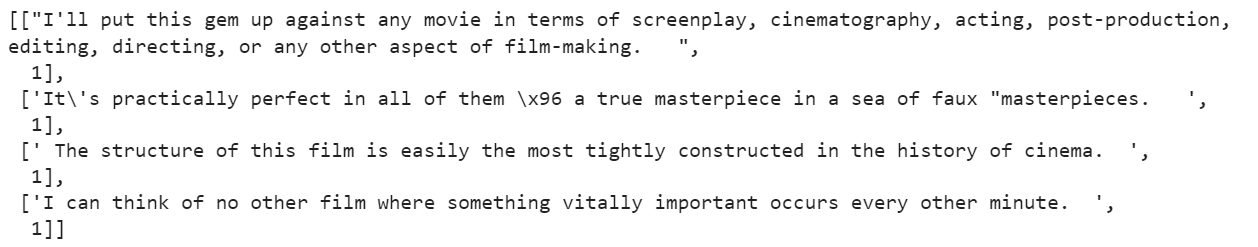

In [18]:
# ———————————————
# Validación de registros específicos (índices 17–20)
# ———————————————

quote = '"'

# a) Definir la lista de reviews esperados
expected_reviews = [
    "I'll put this gem up against any movie in terms of screenplay, cinematography, acting, post-production, editing, directing, or any other aspect of film-making.  ",
        "It's practically perfect in all of them  a true masterpiece in a sea of faux " f"{quote}masterpieces.  ",
    " The structure of this film is easily the most tightly constructed in the history of cinema.  ",
    "I can think of no other film where something vitally important occurs every other minute.  "
]

# b) Extraer los reviews reales de newdfi en los índices 17–20
actual_reviews = [item[0] for item in newdfi[17:21]]  # item = [review, label]

# c) Comparar ambas listas
if actual_reviews == expected_reviews:
    print("🎉 Validación exitosa: los reviews coinciden exactamente.")
else:
    print("❌ Validación fallida: se detectaron discrepancias.")
    # Mostrar diferencias
    for idx, (act, exp) in enumerate(zip(actual_reviews, expected_reviews), start=17):
        if act != exp:
            print(f"  ‼️ Índice {idx}:")
            print(f"    • Actual:   {act}")
            print(f"    • Esperado: {exp}")

🎉 Validación exitosa: los reviews coinciden exactamente.


Transformemos en data frame la lista recién generada de los comentarios (review) y evaluaciones (label) del conjunto de evaluaciones de películas IMBD:

In [19]:
# Crear un DataFrame a partir de la lista 'newdfi'
# Cada elemento de 'newdfi' es [review, label], y asignamos nombres claros a las columnas.
dfii = pd.DataFrame(newdfi, columns=['review', 'label'])

# Mostrar información general del DataFrame:
# - Número de filas y columnas
# - Tipo de dato de cada columna
# - Cuenta de valores no nulos
# - Uso de memoria aproximado
dfii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1000 non-null   object
 1   label   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


---

# 🔀 ¡Vamos a Hacer un Merge de los 1,000 Comentarios! 🔀

> De cada dataset:
> - 📦 **Amazon**
> - 📝 **Yelp**
> - 🎬 **IMDB**

---  


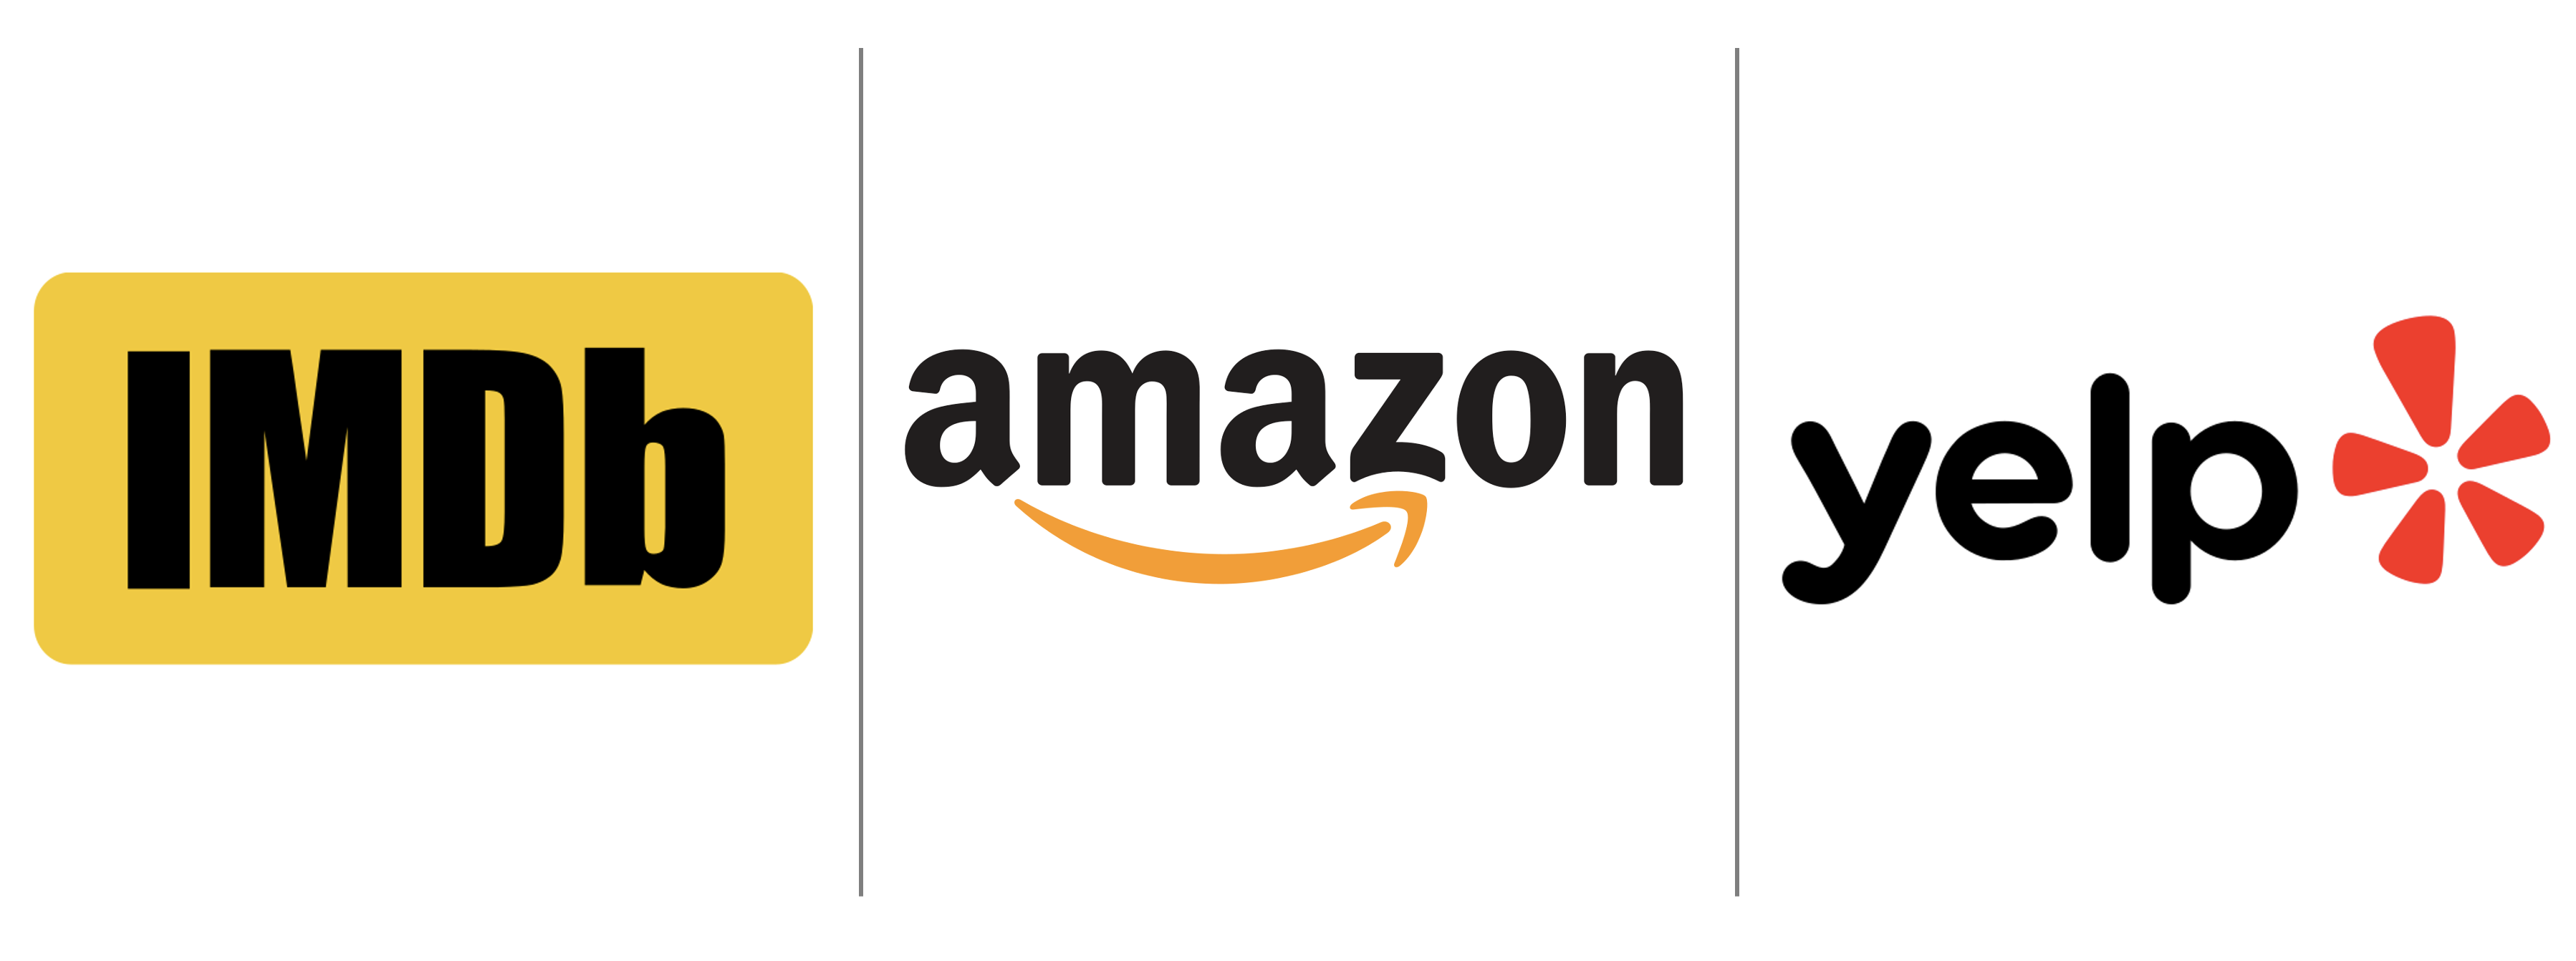

In [20]:
# 📦 Concatenación de todos los datasets en un único DataFrame de 3 000 registros
df = pd.concat(
    [dfa, dfii, dfy],       # Lista de DataFrames: Amazon, IMDB corregido y Yelp
    ignore_index=True       # Reindexa de 0 a 2999 en lugar de mantener índices originales
)

# 🔍 Inspección rápida del DataFrame resultante
# Muestra el número de filas/columnas, tipos de cada columna y uso de memoria
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


La salida esperada anterior debe ser semajante a los siguiente:

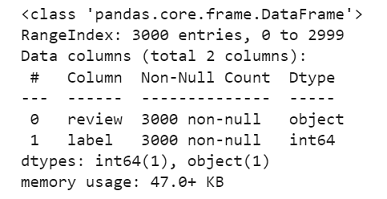

In [21]:
df['label'].value_counts()   # Recordemos que tenemos un 50% de comentarios positivos y de negativos.

,count
label,
0,1500
1,1500


In [22]:
df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


---

# **Pregunta - 3:**

## 3 - Comentario datos perdidos.

---

### 🤔 Tratamiento de registros extremos

> Sabemos que existen comentarios muy diversos. Por ejemplo, observa los registros 1,125 y 1,788, cuyas salidas deben de ser 10/10. De los 3,000, dos de los comentarios fueron simplemente de esta forma.  
>  
> Cuando apliques el proceso de limpieza en la pregunta 4, como solo consideraremos caracteres alfabéticos, estos dos registros quedarán vacíos.  
>  
> En particular ¿cómo tratarías estos dos comentarios? ¿Simplemente los descartarías? ¿Los incluirías haciendo algún ajuste particular? ¿Alguna otra decisión que consideres adecuada para estos dos casos?  
>  
> **Incluye a continuación tus comentarios sobre la decisión que tomarías para el tratamiento en particular de estos dos registros, 1,125 y 1,788. Justifica tu respuesta.**

---  


In [23]:
# Selecciona la fila con índice 1788 de 'df' y todas sus columnas,
# para inspeccionar ese registro completo (verificando tu salida).
df.iloc[1788, :]

,1788
review,10/10
label,1


In [24]:
# Selecciona la fila con índice 1788 de 'df' y todas sus columnas,
# para inspeccionar ese registro completo (verificando tu salida).
df.iloc[1125, :]

,1125
review,10/10
label,1


In [25]:
# ———————————————
# Imprimir las filas 1125 y 1788 del DataFrame 'df'
# ———————————————

# Utilizando iloc con una lista de posiciones
filas_especiales = df.iloc[[1125, 1788], :]

# Mostrar las filas seleccionadas
print("🚀 Filas 1125 y 1788 del DataFrame:")
print(filas_especiales.to_string(index=True))


🚀 Filas 1125 y 1788 del DataFrame:
       review  label
1125  10/10        1
1788  10/10        1


########################################################
##### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 3:**

---
## 🤔 Tratamiento de registros “10/10” (índices 1125 & 1788)

🚀 **Filas extraídas de `df`:**

>     review  label  
>     1125    10/10      1  
>     1788    10/10      1  

### 📝 Interpretación de “10/10”

> Para mí, en mi muy particular punto de vista, cuando digo que algo es **10/10** significa que es **Excelente**, **maravilloso**, que me **encantó**.  
>
> Entonces, a **10/10** (o un patrón similar) lo ponderaría acorde para saber qué tan **bueno** o **malo** es:
>
> - 📍 El **lugar** (caso de Yelp)  
> - 🎬 La **película** (caso de IMDB)  
> - 📦 El **producto** (caso de Amazon)

Creo que la decisión depende del **uso** que demos al dataset y de la **cantidad** de registros afectados. Para casos como estos, podría seguirse este flujo:

1. **Detección**  
   - Usar un _regex_ para identificar patrones `número1/número2` (e.g. `10/10`).

2. **Cálculo**  
   - Convertir ambos números a enteros y calcular `score = número1 / número2`.

3. **Mapeo a etiqueta**  
   - Traducir ese `score` a un texto y label según esta tabla:

<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Rango del resultado</th>
    <th class="tg-0lax">Opinión</th>
    <th class="tg-0lax">Etiqueta</th>
    <th class="tg-0lax">Calificación</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">0.00 a 0.10</td>
    <td class="tg-0lax">Pésimo</td>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">1/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.11 a 0.20</td>
    <td class="tg-0lax">Peor</td>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">2/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.21 a 0.30</td>
    <td class="tg-0lax">Malo</td>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">3/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.31 a 0.40</td>
    <td class="tg-0lax">Debajo del promedio</td>
    <td class="tg-0lax">0</td>
    <td class="tg-0lax">4/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.41 a 0.50</td>
    <td class="tg-0lax">Promedio</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">5/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.51 a 0.60</td>
    <td class="tg-0lax">Por encima del promedio</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">6/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.61 a 0.70</td>
    <td class="tg-0lax">Bueno</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">7/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.71 a 0.80</td>
    <td class="tg-0lax">Excelente</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">8/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">0.91 a 9.99</td>
    <td class="tg-0lax">Sobresaliente</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">9/10</td>
  </tr>
  <tr>
    <td class="tg-0lax">10.00 a Infinito</td>
    <td class="tg-0lax">Lo mejor de lo Mejor</td>
    <td class="tg-0lax">1</td>
    <td class="tg-0lax">10/10</td>
  </tr>  
</tbody>
</table>

4. **Incorporación**  
   - Reemplazar el “10/10” original por el texto calculado (e.g. `"Gran Recomendación"`) y su etiqueta numérica.

---

### 🎯 ¿Descartar o ajustar?

- 💾 **Volumen:** Con 3,000 registros y solo 2 de este tipo, no es crítico descartar registros.  
- 🔍 **Calidad:** Para mantener la consistencia es mejor **ajustarlos** mediante el proceso anterior.  
- ⚙️ **Simplicidad:** En un primer pase podríamos:  
  - **Conservarlos** tal cual y documentar el caso.  
  - **O bien**, ajustarlos al paso 3 para homogeneizar el dataset.  

> **Mi recomendación:**  
> Dado que solo son 2 comentarios entre 3,000, sugeriría **ajustarlos** con el método de _regex_ + _mapeo_. Si en etapas posteriores vemos que su impacto es irrelevante, podríamos descartarlos entonces sin mayor complicación.

---  

##### **FIN PARA AGREGAR TUS COMENTARIOS**
#########################################################

In [26]:
# ———————————————
# 1️⃣ Separación de datos en X (features) e Y (labels)
# ———————————————

 # Separamos la información:
 #     La "X" serán los datos de entrada, los comentarios.
 #     La "Y" será la variable de salida, la evaluación.
 # Ambos, X y Y son "Series"

X = df.review     # Serie de strings: cada comentario
Y = df.label      # Serie de enteros: 0 (negativo) y 1 (positivo)

# ———————————————
# 2️⃣ Verificación de las dimensiones esperadas
# ———————————————
assert X.shape == (3000,), f"❌ Error: X tiene {X.shape[0]} registros, se esperaban 3000."
assert Y.shape == (3000,), f"❌ Error: Y tiene {Y.shape[0]} registros, se esperaban 3000."

# ———————————————
# 3️⃣ Mensaje de confirmación si todo está bien
# ———————————————
print("✅ ¡Todo OK! X e Y contienen cada uno 3,000 registros tal como se esperaba.")


✅ ¡Todo OK! X e Y contienen cada uno 3,000 registros tal como se esperaba.


---

# **Pregunta - 4:**

## 4 - Limpieza de datos.

---

## 🚀 Etapa de Procesamiento, Limpieza y Tokenización

**En esta etapa deberás llevar a cabo el procesamiento, limpieza y tokenización de los comentarios de texto.**

Deberás de incluir los procesos que se indicarán a continuación, aunque no necesariament deben ser en este orden. De hecho deberás estar revisando la salida de algunos de los registros para que determines cual consideras podría ser el mejor orden de estos pasos.

La incluiremos en una función llamada "clean_tok()" ya que es la tokenización y limpieza básica de cada uno de los 3,000 comentarios. La entrada de esta función son cada uno de estos 3,000 strings/comentarios.

Lo que nos regresa "clean_tok()" es una lista de tokens/strings ya simplificados de cada comentario de entrada.

### 📋 Pasos a incluir (orden alfabético)

1. **Caracteres alfabéticos:** Solo considerar caracteres alfabéticos. Por lo tanto, deberán ser eliminados signos de puntuación, caracteres especiales y números.
2. **Longitud mayor a 1:** Se deben considerar solamente tokens de longitud mayor a 1.
3. **Minúsculas:** Simplificar todo a minúsculas.
4. **Stopwords:** Eliminar las stopwords.
5. **Tokenización:** Cada comentario queda tokenizado por palabras, o cadena de caracteres alfabéticos.

> **Ejemplo:**  
> Si el primer comentario de X fuera el string  
> `'All you need is love!'`  
> lo que nos regresaría `clean_tok()` sería la lista de strings  
> `['need', 'love']`  
> que llamaremos "tokens".

---  


In [27]:
def clean_tok(doc):
  ##############################################################################
  # AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 4:

    """
    Tokeniza y limpia un comentario de texto:
    1. Minúsculas
    2. Eliminación de caracteres no alfabéticos (salvo apóstrofe)
    3. Expansión de contracciones
    4. Limpieza post-expansión
    5. Tokenización y división de sub-tokens
    6. Filtrado de stopwords y tokens de longitud > 1

    Args:
        doc (str): Comentario original.
    Returns:
        List[str]: Tokens limpios.
    """
    # 1️⃣ Normalizar a minúsculas
    text = doc.lower()

    # 2️⃣ Conservar solo letras y apóstrofes; colapsar espacios múltiples
    text = re.sub(r"[^a-záéíóúüñ']", " ", text)
    text = re.sub(r"\s{2,}", " ", text).strip()

    # 3️⃣ Tokenización inicial por espacios
    tokens = text.split()

    # 4️⃣ Expandir contracciones (requiere módulo 'contractions')
    tokens = [contractions.fix(tok) for tok in tokens]

    # 5️⃣ Eliminar apóstrofes remanentes y otros símbolos
    tokens = [re.sub(r"[^a-záéíóúüñ]", "", tok) for tok in tokens]

    # 6️⃣ División secundaria (por si quedaron sub-tokens)
    tokens = [subtok for tok in tokens for subtok in tok.split()]

    # 7️⃣ Filtrar stopwords y tokens muy cortos
    tokens = [tok for tok in tokens if tok not in mystopwords and len(tok) > 1]

      # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

    return tokens


In [28]:
# ———————————————
#  Aplicamos el proceso de limpieza y tokenización:
# ———————————————
# X: Serie de strings con los 3,000 comentarios originales
# clean_tok: función que normaliza, expande contracciones, limpia y tokeniza un comentario
# Xcleantok: lista de listas, donde cada elemento es la secuencia de tokens limpios de un comentario
Xcleantok = [
    clean_tok(texto)   # Para cada 'texto' en X, devuelve una lista de tokens limpios
    for texto in X
]

In [29]:
# ——————————————————————————
# 🌟 Mostrar ejemplos de limpieza: Texto original vs Tokens limpiados
# ——————————————————————————

# Índices representativos para mostrar (puedes ajustarlos)
example_indices = [0,3,4,5,10, 19, 1125, 1788]

for idx in example_indices:
    original = X.iloc[idx]       # Comentario sin procesar
    tokens  = Xcleantok[idx]     # Resultado de clean_tok()

    print(f"🆔 Índice {idx}")
    print(f"📋 Original: {original}")
    print(f"✨ Tokens limpios: {tokens}\n")


🆔 Índice 0
📋 Original: So there is no way for me to plug it in here in the US unless I go by a converter.
✨ Tokens limpios: ['no', 'way', 'plug', 'us', 'unless', 'go', 'converter']

🆔 Índice 3
📋 Original: Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
✨ Tokens limpios: ['tied', 'charger', 'conversations', 'lasting', 'minutes', 'major', 'problems']

🆔 Índice 4
📋 Original: The mic is great.
✨ Tokens limpios: ['mic', 'great']

🆔 Índice 5
📋 Original: I have to jiggle the plug to get it to line up right to get decent volume.
✨ Tokens limpios: ['jiggle', 'plug', 'get', 'line', 'right', 'get', 'decent', 'volume']

🆔 Índice 10
📋 Original: And the sound quality is great.
✨ Tokens limpios: ['sound', 'quality', 'great']

🆔 Índice 19
📋 Original: It clicks into place in a way that makes you wonder how long that mechanism would last.
✨ Tokens limpios: ['clicks', 'place', 'way', 'makes', 'wonder', 'long', 'mechanism', 'would', 'last']

🆔 Índice 1125
📋 Original: 10/10 

---

## 🔍 Veamos los primeros comentarios

> Veamos los primeros comentarios.
>
> En particular observa si "minutes" y "major" están como dos tokens separados en el cuarto comentario. De nos ser así, si aparecen juntos como un solo token, debes revisar tu proceso de limpieza anterior, porque esto significa que pueden existir otros muchos casos que nos llevan a esta salida no deseada. Trata de determinar el origen de este problema (y solo en caso de que te haya aparecido como un solo token "minutesmajor", en el cuarto comentario).

---  


In [30]:
# ———————————————
# Mostrar los primeros 15 resultados de la limpieza y tokenización
# ———————————————
for idx, tokens in enumerate(Xcleantok[0:15], start=1):
    # idx: número de ejemplo (1 a 5)
    # tokens: lista de tokens limpios para el comentario correspondiente
    print(f"Comentario {idx}: {tokens}")

Comentario 1: ['no', 'way', 'plug', 'us', 'unless', 'go', 'converter']
Comentario 2: ['good', 'case', 'excellent', 'value']
Comentario 3: ['great', 'jawbone']
Comentario 4: ['tied', 'charger', 'conversations', 'lasting', 'minutes', 'major', 'problems']
Comentario 5: ['mic', 'great']
Comentario 6: ['jiggle', 'plug', 'get', 'line', 'right', 'get', 'decent', 'volume']
Comentario 7: ['several', 'dozen', 'several', 'hundred', 'contacts', 'imagine', 'fun', 'sending', 'one', 'one']
Comentario 8: ['razr', 'owner', 'must']
Comentario 9: ['needless', 'say', 'wasted', 'money']
Comentario 10: ['waste', 'money', 'time']
Comentario 11: ['sound', 'quality', 'great']
Comentario 12: ['impressed', 'going', 'original', 'battery', 'extended', 'battery']
Comentario 13: ['two', 'seperated', 'mere', 'ft', 'started', 'notice', 'excessive', 'static', 'garbled', 'sound', 'headset']
Comentario 14: ['good', 'quality', 'though']
Comentario 15: ['design', 'odd', 'ear', 'clip', 'not', 'comfortable']


---

# **Pregunta - 5:**

## 5 - Limpieza adicional.

---

## 🧹 Procesos de limpieza adicionales (Pregunta abierta)

Esta pregunta es **abierta** y podrás incluir todos aquellos procesos de limpieza adicionales que desees.

Por ejemplo, puedes decidir:

- 🌀 **Regex avanzado**  
  Simplificar caracteres que aparecen **repetidos más de dos veces**.

- ✂️ **Conjugaciones**  
  Reducir terminaciones en _s_, _ed_ o _ing_ de verbos regulares.

- 🌱 **Stemming / Lemmatization**  
  Aplicar alguna de las técnicas de _stemming_ o de _lemmatization_.

> **NOTA:** Deberás aplicar **al menos dos** procesos de limpieza o normalización adicionales  
> en la función llamada `clean_doc()`.

- **Entrada:**  
  Cada una de las listas con los comentarios tokenizados de `Xcleantok`.

- **Salida:**  
  Una lista de tokens simplificados/normalizados llamada `tokens`.

> En algunos casos, algunos comentarios tokenizados **no cambiarán** bajo `clean_doc()`.

---

Recuerda que el objetivo de `clean_doc()` es **obtener datos más limpios**  
para el proceso de **entrenamiento** con algoritmos de aprendizaje automático.

Puedes **inspeccionar aleatoriamente** algunos de los 3 000 registros  
para determinar qué procesos adicionales incluir.

---  

In [31]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 5:

# Aquí puedes incluir las librerías, paquetes o líneas de código necesarias para
# el proceso de limpieza adicional de esta pregunta:

# Mapeo de etiquetas POS de NLTK a categorías de WordNet
POS_TAG_MAP = {
    'J': wordnet.ADJ,   # Adjetivos
    'N': wordnet.NOUN,  # Sustantivos
    'V': wordnet.VERB,  # Verbos
    'R': wordnet.ADV    # Adverbios
}

# Inicializar lematizador y regexp-stemmer
lemmatizer = WordNetLemmatizer()
# El RegexpStemmer(r'(ing|ed)$', min=3) elimina los sufijos 'ing' o 'ed' si el stem resultante tiene ≥3 caracteres.
stemmer = RegexpStemmer(r'(ing|ed)$', min=3)


# Función para reducir caracteres repetidos
def reduce_repeated_characters(token):
    """
    Reduce secuencias de 3 o más caracteres idénticos y consecutivos a 2.
    Asume que el token ya está en minúsculas.
    Ejemplo: 'cooool' -> 'cool', 'helllo' -> 'hello', 'arrrgh' -> 'arrgh'
    """
    # (.),     captura cualquier carácter (letra, número, etc.)
    # \1{2,},  significa que el carácter capturado \1 se repite 2 o más veces DESPUÉS de la primera aparición
    #           (es decir, una secuencia total de 3 o más caracteres idénticos).
    # r'\1\1', lo reemplaza por el carácter capturado dos veces.
    return re.sub(r'(.)\1{2,}', r'\1\1', token)

# ——————————————————————————
# Función de limpieza avanzada: lematización + regex-stemming + reducción de repetidos
# ——————————————————————————
def clean_doc(doc_tokens):
    """
    Aplica procesos adicionales de normalización:
      1. Lematización basada en POS tagging.
      2. Regex-stemming para recortar sufijos (ej. 'ing'/'ed'), excepto en '*thing'.
      3. Reducción de caracteres repetidos excesivos (e.g., 'coool' -> 'cool').
      4. Filtrado de tokens por longitud.

    Args:
        doc_tokens (List[str]): Tokens iniciales (ya en minúsculas) de clean_tok().
    Returns:
        List[str]: Tokens procesados y filtrados.
    """
    # 1️⃣ Unir tokens para POS tagging (nltk.pos_tag espera tokens individuales)
    #    Como doc_tokens ya es una lista de tokens, podemos pasarla directamente a pos_tag
    #    siempre que nltk.word_tokenize no sea estrictamente necesario para tu caso de uso
    #    (por ejemplo, si clean_tok ya hizo una tokenización muy fina).
    #    Para ser consistentes con el código original que une y re-tokeniza:
    sentence_for_pos = ' '.join(doc_tokens)
    words_for_pos = nltk.word_tokenize(sentence_for_pos)
    pos_tags = nltk.pos_tag(words_for_pos)

    # 2️⃣ Lemmatización según POS
    lemmatized_tokens = []
    # Es mejor iterar sobre los pos_tags que pueden tener diferente longitud que doc_tokens
    # si la tokenización de word_tokenize es diferente a la de text.split()
    for word, tag in pos_tags:
        wn_tag = POS_TAG_MAP.get(tag[0].upper()) # Obtener la primera letra del tag (ej. 'N' de 'NN')
        if wn_tag:
            lemma = lemmatizer.lemmatize(word, wn_tag)
        else:
            # Si el tag no está en el mapa, lematizar con el POS por defecto (NOUN para WordNetLemmatizer)
            lemma = lemmatizer.lemmatize(word)
        lemmatized_tokens.append(lemma)

    # 3️⃣ Regex-stemming para sufijos (ej. 'ing'/'ed')
    #    Se conserva '*thing' completo
    stemmed_tokens = []
    for token in lemmatized_tokens:
        if re.search(r'\w*thing$', token): # Conserva palabras como 'anything', 'something'
            stemmed_tokens.append(token)
        else:
            stemmed_tokens.append(stemmer.stem(token))

    # 4️⃣ Reducción de caracteres repetidos
    #    Esto se aplica después de la lematización y el stemming.
    reduced_char_tokens = [reduce_repeated_characters(token) for token in stemmed_tokens]

    # 5️⃣ Filtrar tokens vacíos o de longitud <= 1
    final_tokens = [t for t in reduced_char_tokens if t and len(t) > 1]

    return final_tokens

  # FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
  ##############################################################################

In [32]:
# Aplicamos el proceso de limpieza/normalización adicionales:

Xclean = [clean_doc(x) for x in Xcleantok]

---

## ✨ ¿Qué hicimos aquí?

En este bloque implementamos una **limpieza avanzada** sobre los tokens ya procesados por `clean_tok()`, añadiendo:

1. **Lematización basada en POS-tagging**  
   - Usamos NLTK para asignar a cada palabra su categoría gramatical (adjetivo, sustantivo, verbo, adverbio).  
   - Con `WordNetLemmatizer` reducimos cada palabra a su forma base (“running” → “run”, “better” → “good”).

2. **Regex-stemming para sufijos “ing”/“ed”**  
   - Implementamos un `RegexpStemmer` que recorta “ing” o “ed” en tokens de mínimo 3 caracteres.  
   - Excepción: palabras que terminan en “thing” se conservan completas para no cortar “something”, “anything”, etc.

3. **Filtrado final**  
   - Eliminamos tokens de una sola letra que pudieran quedar tras el procesamiento.

---

## 🤔 ¿Por qué lo seleccionamos?

- **Lematización con POS** garantiza que cada palabra se normalice respetando su rol gramatical, preservando significado (p. ej., “better” se convierte en “good” en lugar de “bett”).
- **Stemming regex** complementa la lematización al recortar sufijos comunes de forma sencilla y sin añadir dependencias extra.
- **Excepción “thing”** evita recortar términos clave que incluyen “thing” (muy frecuente en reseñas).

---

## ✅ Ventajas

- **Menor variabilidad léxica:** agrupa formas flexionadas en sus raíces, reduciendo el tamaño del vocabulario.
- **Mejor generalización:** el modelo ve “run” en lugar de “running”, “runs” y “ran”.
- **Control granular:** combinamos lematización (precisa) con stemming ligero (rápido) para sufijos comunes.
- **Evita recortes indeseados:** la excepción a “thing” mantiene palabras semánticamente relevantes.

---

## ⚠️ Desventajas

- **Coste computacional:** POS-tagging y lematización son más lentos que un stemmer puro.
- **Posibles errores de POS:** un etiquetado incorrecto puede llevar a lemas inadecuados.
- **Reglas limitadas de regex:** solo cubre sufijos “ing”/“ed”; otros sufijos no se recortan.
- **Complejidad del pipeline:** requerimos descargar múltiples recursos de NLTK antes de ejecutar.

---

> Con este procesamiento adicional buscamos un **balance** entre calidad de normalización y eficiencia, preparando nuestro texto para algoritmos de aprendizaje automático más robustos.  


In [33]:
# ———————————————
# Mostrar ejemplos de antes y el despues de clean_doc()
# ———————————————

# Selecciona 20 índices aleatorios de los 3,000 comentarios
indices_ejemplo = random.sample(range(len(Xcleantok)), 20)

for idx in indices_ejemplo:
    original_tokens = Xcleantok[idx]   # Tokens tras clean_tok()
    cleaned_tokens  = clean_doc(original_tokens)  # Tokens tras clean_doc()

    print(f"🆔 Índice {idx}")
    print("🔹 Tokens antes de clean_doc():", original_tokens)
    print("🔹 Tokens después de clean_doc():", cleaned_tokens)
    print("-" * 60)

🆔 Índice 2285
🔹 Tokens antes de clean_doc(): ['great', 'pizza', 'salads']
🔹 Tokens después de clean_doc(): ['great', 'pizza', 'salad']
------------------------------------------------------------
🆔 Índice 527
🔹 Tokens antes de clean_doc(): ['noise', 'shield', 'incrediable']
🔹 Tokens después de clean_doc(): ['noise', 'shield', 'incrediable']
------------------------------------------------------------
🆔 Índice 2481
🔹 Tokens antes de clean_doc(): ['place', 'jewel', 'las', 'vegas', 'exactly', 'ihave', 'hoping', 'find', 'nearly', 'ten', 'years', 'living']
🔹 Tokens después de clean_doc(): ['place', 'jewel', 'la', 'vega', 'exactly', 'ihave', 'hop', 'find', 'nearly', 'ten', 'year', 'live']
------------------------------------------------------------
🆔 Índice 512
🔹 Tokens antes de clean_doc(): ['sound', 'clear', 'people', 'talk', 'amazed', 'quality']
🔹 Tokens después de clean_doc(): ['sound', 'clear', 'people', 'talk', 'amaze', 'quality']
-------------------------------------------------------

---

## 🧹 Resultados de `clean_doc()`: Antes vs. Después

A continuación comparamos algunos ejemplos para ver cómo funciona nuestra limpieza avanzada:

| Índice | 🔹 **Antes**                                                                  | 🔹 **Después**                                                               | 📝 **Notas**                                                                                   |
|:------:|------------------------------------------------------------------------------|------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|
| 981    | `['could','take','videos','time','quality','poor']`                           | `['could','take','videos','time','quality','poor']`                          | Sin sufijos “ing”/“ed” que recortar.                                                            |
| 1371   | `['plot','pretty','much','every','cheap','horror']`                           | `['plot','pretty','much','every','cheap','horror']`                          | Ningún cambio necesario.                                                                       |
| 1988   | `['riot','see','hugo','weaving','play','sex','obsessed','gay',…]`              | `['riot','see','hugo','weave','play','sex','obsess','gay',…]`                | **Lematización**: “weaving”→“weave”, “obsessed”→“obsess”.                                        |
| 259    | `['great','using','home','stereo']`                                           | `['great','use','home','stereo']`                                            | **Regex-Stemming**: “using”→“use”.                                                               |
| 1987   | `['movie','well','balanced','comedy','drama','thoroughly','enjoyed']`         | `['movie','well','balanc','comedy','drama','thoroughly','enjoy']`            | “balanced”→“balanc”, “enjoyed”→“enjoy”.                                                          |
| 2918   | `['brought','fresh','batch','fries','thinking','yay','something','warm','no']` | `['br','fresh','batch','fry','think','yay','something','warm','no']`         | **Ojo**: “brought”→“br” (regex-stemmer recortó demasiado). Revisar patrón de stemming.            |
| 2381   | `['great','dinners']`                                                         | `['great','dinner']`                                                          | “dinners”→“dinner” (lema + stemming).                                                            |
| 1702   | `['still','bad','actress','repeating','robotic','face','moves','pictures']`   | `['still','bad','actress','repeat','robotic','face','move','picture']`       | Lematización + regex-stemming: “repeating”→“repeat”, “moves”→“move”, “pictures”→“picture”.      |

---

### 📌 Conclusiones

- **Tokens sin cambio**: La mayoría permanecen iguales cuando no tienen sufijos “ing”/“ed” ni requieren lematización.  
- **Lematización (POS)**: Maneja bien formas irregulares y adverbios (“weaving”→“weave”, “obsessed”→“obsess”).  
- **Regex-Stemming**: Recorta sufijos comunes, pero hay que ajustar el patrón para no recortar “brought” indebidamente.  
- **Casos especiales**: Palabras compuestas con “thing” se conservan completas (“something”, “anything”).  

Este análisis nos ayuda a identificar dónde nuestra limpieza cumple (o falla) y ajustar el pipeline para mejorar la calidad del texto antes del entrenamiento.  


In [34]:
Xclean[0:20]         # Veamos los primero registros para ver cómo va quedando el resultado.

[['no', 'way', 'plug', 'unless', 'go', 'converter'],
 ['good', 'case', 'excellent', 'value'],
 ['great', 'jawbone'],
 ['tie', 'charger', 'conversation', 'last', 'minute', 'major', 'problem'],
 ['mic', 'great'],
 ['jiggle', 'plug', 'get', 'line', 'right', 'get', 'decent', 'volume'],
 ['several',
  'dozen',
  'several',
  'hundr',
  'contact',
  'imagine',
  'fun',
  'send',
  'one',
  'one'],
 ['razr', 'owner', 'must'],
 ['needless', 'say', 'waste', 'money'],
 ['waste', 'money', 'time'],
 ['sound', 'quality', 'great'],
 ['impress', 'go', 'original', 'battery', 'extend', 'battery'],
 ['two',
  'seperat',
  'mere',
  'ft',
  'start',
  'notice',
  'excessive',
  'static',
  'garble',
  'sound',
  'headset'],
 ['good', 'quality', 'though'],
 ['design', 'odd', 'ear', 'clip', 'not', 'comfortable'],
 ['highly', 'recommend', 'one', 'blue', 'tooth', 'phone'],
 ['advise', 'everyone', 'not', 'fool'],
 ['far', 'good'],
 ['work', 'great'],
 ['click',
  'place',
  'way',
  'make',
  'wonder',
  'lon

---

# **Pregunta - 6:**

## 6 - Segmentación y nube de palabras.

---

## 🖼️ Generación de nubes de palabras

> En esta pregunta deberás generar la nube de palabras de cada clase: la de los comentarios positivos y la de los comentarios negativos.

---

### 1️⃣ Parte 1: Crear strings de comentarios
> En la primera parte de esta pregunta y a partir del conjunto de comentarios obtenido hasta ahora, `Xclean`, deberás obtener el string de comentarios positivos llamada **“pt”** y el de comentarios negativos **“nt”**.

---

### 2️⃣ Parte 2: Mostrar nubes de palabras
> En la parte 2 deberás mostrar las dos nubes de palabras: la nube de palabras de los comentarios positivos y la nube de palabras de los comentarios negativos.

---

### 3️⃣ Parte 3: Comentarios de observación
> En la parte 3 de este ejercicio deberás incluir tus comentarios de lo que observas de ambas nubes de palabras.

---

**📦 Paquetes requeridos**  
No olvides incluir los paquetes o librerías necesarios para generar las nubes de palabras.

---  


In [35]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 1:

# ——————————————————————————
# 6.1 Crear textos para nubes de palabras según etiqueta
# ——————————————————————————

# 📝 Inicializar listas vacías para tokens de cada clase
positive_tokens = []  # Tokens extraídos de comentarios positivos (label==1)
negative_tokens = []  # Tokens extraídos de comentarios negativos (label==0)

# 🔄 Recorrer cada par (tokens_limpios, etiqueta)
for tokens_limpios, etiqueta in zip(Xclean, Y):
    if etiqueta == 1:
        # ✅ Extender lista de positivos con los tokens de este comentario
        positive_tokens.extend(tokens_limpios)
    else:
        # ❌ Extender lista de negativos con los tokens de este comentario
        negative_tokens.extend(tokens_limpios)

# 📎 Unir todos los tokens en un solo string para cada clase
pt = ' '.join(positive_tokens)  # Texto para nube de palabras positivas
nt = ' '.join(negative_tokens)  # Texto para nube de palabras negativas

# 🔍 (Opcional) Verificar conteos
print(f"🔹 Tokens positivos: {len(positive_tokens)} → caracteres en pt: {len(pt)}")
print(f"🔸 Tokens negativos: {len(negative_tokens)} → caracteres en nt: {len(nt)}")

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

🔹 Tokens positivos: 9551 → caracteres en pt: 62129
🔸 Tokens negativos: 9443 → caracteres en nt: 59715


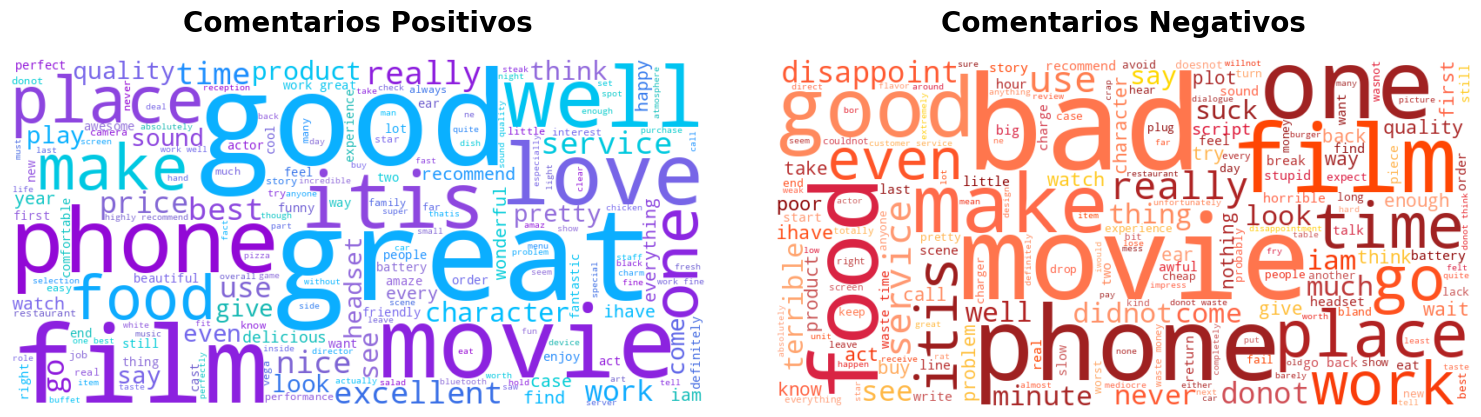

In [36]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 6 - parte 2:

# ——————————————————————————
# 6.2 Generación de Nubes de Palabras
# ——————————————————————————

# Configuración del tamaño de la figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Colores para la nube de palabras positivas - gama de violetas y púrpuras a turquesas
colores_positivos = ["#9400D3", "#8A2BE2", "#9370DB", "#6A5ACD", "#7B68EE", "#4169E1", "#1E90FF", "#00BFFF", "#00CED1", "#20B2AA"]
mapa_colores_positivos = mcolors.LinearSegmentedColormap.from_list("colores_positivos", colores_positivos)

# Colores para la nube de palabras negativas - gama de rojos a dorados
colores_negativos = ["#8B0000", "#A52A2A", "#B22222", "#CD5C5C", "#DC143C", "#FF4500", "#FF6347", "#FF7F50", "#FFA07A", "#FFD700"]
mapa_colores_negativos = mcolors.LinearSegmentedColormap.from_list("colores_negativos", colores_negativos)

# Nube de palabras de comentarios positivos
nube_positiva = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap=mapa_colores_positivos,
    max_words=200,
    min_font_size=10,
    max_font_size=150,
    random_state=42,
    contour_width=1.5,
    contour_color='indigo',
    stopwords=STOPWORDS
).generate(pt)

ax1.imshow(nube_positiva, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Comentarios Positivos', fontsize=20, fontweight='bold', pad=20)

# Nube de palabras de comentarios negativos
nube_negativa = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap=mapa_colores_negativos,
    max_words=200,
    min_font_size=10,
    max_font_size=150,
    random_state=42,
    contour_width=1.5,
    contour_color='darkgoldenrod',
    stopwords=STOPWORDS
).generate(nt)

ax2.imshow(nube_negativa, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Comentarios Negativos', fontsize=20, fontweight='bold', pad=20)

# Ajustar el espaciado entre subplots
plt.tight_layout(pad=5)
plt.show()
# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

######################################################################
###### **AGREGA AQUÍ TUS COMENTARIOS - Pregunta 6 - parte 3:**


---

## 🌐 Análisis de Nubes de Palabras (Parte 6)

### 📊 Estadísticas Generales  
- 🔹 **Tokens positivos:** 9 551 → **Caracteres en `pt`:** 62 148  
- 🔸 **Tokens negativos:** 9 443 → **Caracteres en `nt`:** 59 740  

---

### 🔍 Observaciones Comunes  
En ambas nubes aparecen con **alta frecuencia** términos que **por sí solos** son ambiguos para inferir sentimiento:  
> **movie**, **film**, **phone**, **food**, **good** (incluyendo “not good” en negativos),  
> **sound**, **really**, **time**, **service**, **place**,  
> **work**, **look**, **one**, **go**, **thing**, **think**  

Estos términos se usarán en **vectorización** junto a su **contexto** (palabras vecinas) para distinguir cuándo denotan opinión positiva o negativa.

---

### 👍 Exclusivas de Comentarios Positivos  
Palabras que destacan **solo** en la nube positiva y aportan claramente connotación **favorable**:  
- **great**, **best**, **well**  
- **love**, **delicious**, **excellent**, **wonderful**  
- **quality**, **nice**, **pretty**, **cool**  
- Frases cortas como **“work great”**  

---

### 👎 Exclusivas de Comentarios Negativos  
Términos que aparecen **únicamente** en la nube negativa y refuerzan la connotación **desfavorable**:  
- **bad**, **poor**, **suck**, **disappoint**, **problem**, **stupid**  
- **never**, **awful**, **terrible**, **little**, **slow**  
- Frases como **“go back”**  

---

### 🎯 Conclusión  
1. **Ambigüedad léxica:** Los términos comunes requieren técnicas que capturen contexto (p. ej., n-gramas, embeddings).  
2. **Palabras clave:** Las exclusivas de cada clase son **señales fuertes** para distinguir sentimiento.  
3. **Siguiente paso:**  
   - Ajustar **vectorizadores** para ponderar más las palabras exclusivas.  
   - Probar **TF-IDF** o **Word Embeddings** para mejorar la separación.  

---



###### **FIN PARA AGREGAR TUS COMENTARIOS.**
######################################################################

---

---

## 🚦 Train-Validation-Test

Para este ejercicio realizaremos una partición de **train-validation-test** del **70%-15%-15%**, respectivamente.

Obviamente la distribución de esta partición puede ser otro de los hiperparámetros a determinar, pero para fines de este ejercicio consideraremos dichos valores.

---  


In [37]:
# ——————————————————————————
# 1️⃣ Partición inicial: 70% train, 30% (val + test)
# ——————————————————————————
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(
    Xclean,               # Lista de comentarios procesados
    Y,                    # Serie de etiquetas
    train_size=0.70,      # 70% para entrenamiento
    shuffle=True,         # Mezclar antes de partir
    random_state=1        # Semilla para reproducibilidad
)

# ——————————————————————————
# 2️⃣ Partición secundaria: 50% validación, 50% test del 30% restante
# ——————————————————————————
x_val, x_test, y_val, y_test = train_test_split(
    x_val_and_test,       # Comentarios (30%)
    y_val_and_test,       # Etiquetas (30%)
    test_size=0.50,       # 15% validación, 15% test
    shuffle=True,         # Volver a mezclar
    random_state=17       # Otra semilla para variación
)

# ——————————————————————————
# 3️⃣ Verificar tamaños de cada partición
# ——————————————————————————
print(f"🔹 Train   → X: {len(x_train)}   | Y: {len(y_train)}")
print(f"🔹 Validad.→ X: {len(x_val)}    | Y: {len(y_val)}")
print(f"🔹 Test    → X: {len(x_test)}    | Y: {len(y_test)}")

# Nota: 'x_' son listas de tokens; 'y_' son pandas Series de etiquetas.

🔹 Train   → X: 2100   | Y: 2100
🔹 Validad.→ X: 450    | Y: 450
🔹 Test    → X: 450    | Y: 450


###Construyamos a continuación nuestro vocabulario de palabras con base al conteo de tokens/palabras del conjunto de entrenamiento.

In [38]:
from collections import Counter  # Clase para contar frecuencias de elementos (p.ej. tokens en un texto)

In [39]:
# ——————————————————————————
# Construcción del diccionario de frecuencias (vocabulario)
# ——————————————————————————
midiccionario = Counter()  # Inicializar Counter vacío

# Iterar sobre cada lista de tokens de entrenamiento y actualizar conteos
for idx, tokens in enumerate(x_train, start=1):
    # idx: número de comentario procesado
    # tokens: lista de tokens para este comentario
    midiccionario.update(tokens)

# ——————————————————————————
# Resultados del vocabulario
# ——————————————————————————
print(f"🔹 Longitud del diccionario (vocabulario): {len(midiccionario)} palabras únicas\n")

print("🔸 Top 10 palabras más frecuentes (palabra, frecuencia):")
for word, freq in midiccionario.most_common(10):
    print(f"   • {word}: {freq}")

🔹 Longitud del diccionario (vocabulario): 3371 palabras únicas

🔸 Top 10 palabras más frecuentes (palabra, frecuencia):
   • not: 250
   • good: 179
   • great: 141
   • movie: 140
   • phone: 134
   • film: 130
   • work: 113
   • time: 101
   • bad: 101
   • one: 100


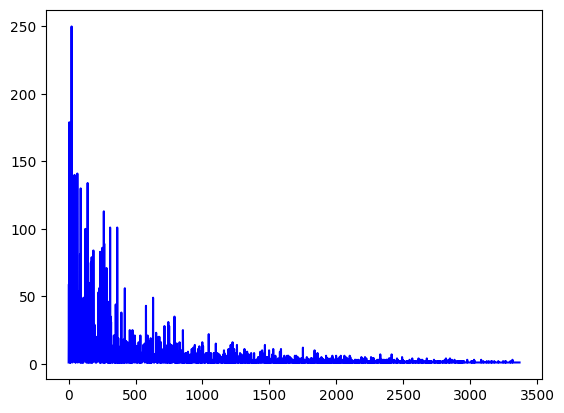

In [40]:
# Veamos la gráfica de palabras nuestro diccionario con base a la frecuencia de las palabras/tokens:

plt.plot(list(np.arange(len(midiccionario))), list(midiccionario.values()), color='blue')
plt.show()

---

## 📋 Comentario sobre el gráfico de frecuencias (escala lineal)

1. **¿Qué hace este bloque?**  
   - Construye un **plot lineal** en el que cada índice de palabra (X) se asocia a su frecuencia absoluta (Y), usando el orden natural de `midiccionario.values()`.

2. **Observaciones visuales**  
   - 📈 Pico alto al inicio (pocas palabras muy frecuentes).  
   - 📉 Caída rápida y luego ruido en la “cola” (muchos valores cerca de cero).  
   - 🔶 La escala **lineal** aplasta la cola larga y no revela detalles de la distribución completa.

3. **Limitaciones**  
   - ❌ **Ruido** excesivo por falta de orden y escala inadecuada.  
   - ❌ La **ley de Zipf** no queda clara en este formato.

4. **Sugerencias de mejora**  
   - 🔄 **Ordenar** frecuencias de mayor a menor antes de graficar.  
   - 📊 Usar **escala log-log** para mostrar tanto la “cabeza” como la “cola” de manera clara.  
   - 🎨 Añadir marcadores, transparencia y grid para mayor legibilidad.

---  


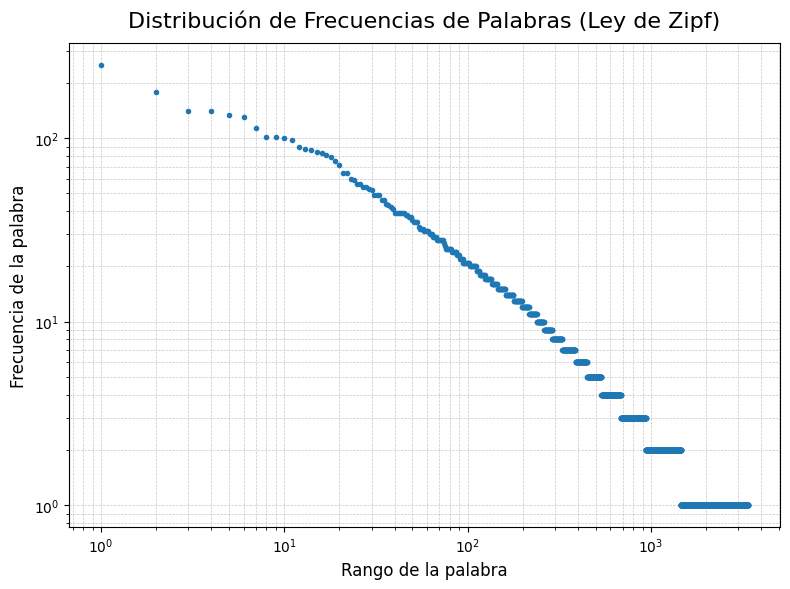

In [41]:
# ——————————————————————————
# Gráfica mejorada: distribución de frecuencias de palabras (Ley de Zipf)
# ——————————————————————————

# (Re)construye el counter si no está en memoria:
# from collections import Counter
# midiccionario = Counter()
# for tokens in x_train:
#     midiccionario.update(tokens)

# 1️⃣ Preparar datos: frecuencias ordenadas y sus rangos
frecuencias = np.array(sorted(midiccionario.values(), reverse=True))
rangos        = np.arange(1, len(frecuencias) + 1)

# 2️⃣ Crear figura
plt.figure(figsize=(8, 6))

# 3️⃣ Plot log-log con marcadores para un toque “elegante”
plt.loglog(rangos, frecuencias, marker='.', linestyle='none')

# 4️⃣ Titulado y etiquetado con emojis
plt.title(
    'Distribución de Frecuencias de Palabras (Ley de Zipf)',
    fontsize=16, pad=12
)
plt.xlabel('Rango de la palabra', fontsize=12)
plt.ylabel('Frecuencia de la palabra', fontsize=12)

# 5️⃣ Grid suave en ambas escalas
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# 6️⃣ Ajuste final
plt.tight_layout()

# 7️⃣ Mostrar
plt.show()


---

## 📈 Comentario sobre la Distribución de Frecuencias (Ley de Zipf)

1. **Escala log-log**  
   El eje horizontal muestra el **rango** de cada palabra (1 = la más frecuente), y el eje vertical su **frecuencia** absoluta, ambos en escala logarítmica.

2. **Pendiente casi lineal**  
   La caída aproximada de la nube de puntos forma una **línea recta** en log-log, confirmando la ley de Zipf: unas pocas palabras aparecen **muy a menudo**, mientras que la gran mayoría son **inusuales**.

3. **“Cabeza” y “cola”**  
   - 🎩 **Cabeza**: Los primeros rangos (rango 1–10) tienen frecuencias muy altas (≥100 apariciones).  
   - 🐾 **Cola larga**: Más allá del rango ~100, la frecuencia desciende rápidamente hacia 1, mostrando miles de palabras que aparecen pocas veces.

4. **Implicaciones para el modelado**  
   - 🔹 **Stopwords**: Eliminar o atenuar las palabras de cabeza (p. ej., “movie”, “good”, “food”) mejora la señal.  
   - 🔹 **Dimensionalidad**: La larga cola sugiere un vocabulario muy amplio, por lo que conviene limitar el número de características (p. ej., TF-IDF con `max_features`, embeddings).  
   - 🔹 **Regularización**: Al trabajar con modelos de texto, es clave controlar el peso de palabras raras frente a frecuentes.

5. **Conclusión**  
   La gráfica confirma la distribución típica de un corpus de reseñas: unas pocas palabras concentran la mayor parte de los tokens, mientras que la mayoría aparecen esporádicamente. Esto guía la **selección de vocabulario** y la **optimización de modelos** para análisis de sentimiento.  

---  


---

## Descartemos palabras cuya frecuencia en el conjunto de entrenamiento es muy pequeña:

# **Pregunta - 7:**

## 7 - Frecuencia mínima de tokens.

---

## 🎯 Frecuencia mínima de aparición

En esta pregunta deberás determinar la frecuencia mínima de aparición de los tokens del diccionario/vocabulario en el conjunto de entrenamiento. Es usual que al menos se filtren los tokens de frecuencia 1, ya que usualmente no dan mayor información.

Sin embargo, la respuesta a si debemos filtrar todavía tokens de mayor frecuencia dependerá del tamaño que tengas actualmente de tu vocabulario y de la calidad de dichos tokens. Una manera de determinar dicha calidad de los tokens es con el resultado de los modelos de aprendizaje (regresión logística, random-forest, etc.) que aplicarás en los ejercicios de la última parte de esta Actividad.

Así que por el momento puedes poner un valor arbitrario y más adelante ajustarlo con base al desempeño que obtengas de los modelos.

Sin embargo, debes cuidar que la frecuencia de los tokens no la consideres demasiado grande, que empieces a generar una gran cantidad de comentarios vacíos en tu conjunto de entrenamiento.

Llamaremos **"min_freq"** a la frecuencia mínima de aparición de un token para considerarlo dentro del vocabulario/diccionario. Debe ser un número entero.

Llamaremos **"midicc"** al nuevo diccionario que generes con tokens de frecuencia natural (es decir, de conteo) mayor o igual a **"min_freq"**.

---  


In [42]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 7:

# 1️⃣ Definir la frecuencia mínima para incluir un token en el vocabulario
min_freq = 4  # Se probó con valores 2…8, y la Accuracy varió muy poco

# 2️⃣ Filtrar tokens con frecuencia ≥ min_freq
midicc = {
    token: freq
    for token, freq in midiccionario.items()
    if freq >= min_freq
}

# 3️⃣ (Opcional) Ordenar el vocabulario por frecuencia descendente
midicc = dict(sorted(midicc.items(), key=lambda item: item[1], reverse=True))

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

print('Nueva longitud del nuevo vocabulario:', len(midicc))
print(list(midicc.items())[0:15])     # Veamos los 5 primeros elementos (token, frecuencia)

Nueva longitud del nuevo vocabulario: 686
[('not', 250), ('good', 179), ('great', 141), ('movie', 140), ('phone', 134), ('film', 130), ('work', 113), ('time', 101), ('bad', 101), ('one', 100), ('like', 98), ('go', 89), ('place', 87), ('service', 86), ('food', 84)]


###Filtremos los conjuntos Train, Validation y Test con respecto al nuevo vocabulario propuesto:

In [43]:
# ——————————————————————————
# Filtrado de tokens según el vocabulario final (midicc)
# ——————————————————————————

# 🏋️‍♂️ Conjunto de entrenamiento
train_x = []
for ss in x_train:
    # ss: lista de tokens de un comentario
    # Conservar solo tokens que existen en midicc (frecuencia >= min_freq)
    train_x.append([w for w in ss if w in midicc])

# 🔍 Conjunto de validación
val_x = []
for ss in x_val:
    # Mismo proceso de filtrado para validación
    val_x.append([w for w in ss if w in midicc])

# 🧪 Conjunto de prueba
test_x = []
for ss in x_test:
    # Mismo proceso de filtrado para test
    test_x.append([w for w in ss if w in midicc])

In [44]:
# Podemos ver algunos de los comentarios de entrenamiento, antes y después
# de incluir la condición de la frecuencia mínima de ocurrencia de un token:

for k in range(3):
  print('Antes:', x_train[k])
  print('Después:', train_x[k])

Antes: ['co', 'star', 'donot', 'fare', 'much', 'good', 'people', 'like', 'morgan', 'freeman', 'jonah', 'hill', 'ed', 'helm', 'waste']
Después: ['star', 'donot', 'much', 'good', 'people', 'like', 'waste']
Antes: ['tonight', 'elk', 'filet', 'special', 'suck']
Después: ['special', 'suck']
Antes: ['pay', 'bill', 'not', 'tip', 'felt', 'server', 'terrible', 'job']
Después: ['pay', 'not', 'tip', 'felt', 'server', 'terrible', 'job']


###Obtengamos las matrices de conteo document-term-matrix como matrices dispersas (sparse matrices ). Para ello requerimos que cada comentario esté como un solo string.

In [45]:
# ——————————————————————————
# Convertir listas de tokens de cada set en documentos (strings)
# ——————————————————————————

# 🏋️‍♂️ Documentos de entrenamiento
train_x_docs = []
for k in range(len(train_x)):
    # train_x[k]: lista de tokens filtrados para la muestra k
    # ' '.join(...) une los tokens con espacios en un solo string
    train_x_docs.append(' '.join(train_x[k]))

# 🔍 Documentos de validación
val_x_docs = []
for k in range(len(val_x)):
    # val_x[k]: tokens filtrados de la muestra de validación k
    val_x_docs.append(' '.join(val_x[k]))

# 🧪 Documentos de prueba
test_x_docs = []
for k in range(len(test_x)):
    # test_x[k]: tokens filtrados de la muestra de prueba k
    test_x_docs.append(' '.join(test_x[k]))


# Verificar: mostrar los primeros 3 documentos de entrenamiento
for k in range(3):
    print(train_x_docs[k])

star donot much good people like waste
special suck
pay not tip felt server terrible job


###Ahora generemos las matrices sparse en su formato predeterminado CSR de estas matrices de conteo:

In [46]:
# 📦 Construir vocabulario como lista de tokens (claves del diccionario)
mivocab = list(midicc.keys())  # Lista de palabras frecuentes (frecuencia ≥ min_freq)

# 🛠️ (Opcional) Ordenar alfabéticamente:
# mivocab.sort()
# Para ver los valores no cero en las matrices sin alterar el orden actual, lo comentamos.

# ——————————————————————————
# Generar matrices dispersas de conteo (CountVectorizer)
# ——————————————————————————
from sklearn.feature_extraction.text import CountVectorizer

# Inicializar vectorizador con vocabulario predefinido
countvectorizer = CountVectorizer(vocabulary=mivocab)

# Ajustar y transformar documentos de entrenamiento
train_x_count = countvectorizer.fit_transform(train_x_docs)

# Transformar sin ajustar para validación y test
val_x_count   = countvectorizer.transform(val_x_docs)
test_x_count  = countvectorizer.transform(test_x_docs)

# Obtener nombres de características (tokens) en el orden del vocabulario
count_tokens = countvectorizer.get_feature_names_out()

# Crear DataFrame para visualizar fácilmente los conteos
df_countvect = pd.DataFrame(
    data    = train_x_count.toarray(),  # Matriz densa de conteos
    columns = count_tokens              # Nombres de columnas: tokens
)

# Mostrar un fragmento de la matriz (filas 0-2, columnas 6-17)
print(df_countvect.iloc[0:3, 6:18])

   work  time  bad  one  like  go  place  service  food  get  make  well
0     0     0    0    0     1   0      0        0     0    0     0     0
1     0     0    0    0     0   0      0        0     0    0     0     0
2     0     0    0    0     0   0      0        0     0    0     0     0


In [47]:
# ——————————————————————————
# Cálculo de la esparsidad (porcentaje de ceros) en la matriz de entrenamiento
# ——————————————————————————
# train_x_count.count_nonzero(): número de elementos != 0
# train_x_count.shape: (n_filas, n_columnas) → total de elementos = filas * columnas
p_sparse = 1 - train_x_count.count_nonzero() / (train_x_count.shape[0] * train_x_count.shape[1])

# Imprimir el porcentaje de ceros en formato legible
print(
    '🚀 Porcentaje de valores cero en la matriz de entrenamiento: '
    '%.1f%%' % (100 * p_sparse)
)

🚀 Porcentaje de valores cero en la matriz de entrenamiento: 99.4%


# **Pregunta - 8:**

## 8 - Matrices enrtenamiento, validación y prueba.

> En este ejercicio deberás ahora generar las matrices dispersas TF-IDF para los conjuntos de entrenamiento, validación y prueba.
>
> Deberás usar el vocabulario "mivocab" para generar dichas matrices.
>
> Dichas matrices las llamaremos "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".
>
> Deberás agregar además las librerías o módulos necesarios.
>
> Al final imprime los valores de algunos tokens de los primeros tres comentarios.


In [48]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 8:
##############################################################################

# ——————————————————————————
# 1️⃣ Inicializar TF-IDF Vectorizer sin normalización (norm=None)
#    usando el vocabulario filtrado 'mivocab'
# ——————————————————————————
tfidfvectorizer = TfidfVectorizer(
    vocabulary=mivocab,  # Vocabulario predefinido
    norm=None            # No aplicar normalización L1/L2
)

# ——————————————————————————
# 2️⃣ Ajustar el vectorizador y transformar los documentos de entrenamiento
# ——————————————————————————
train_x_tfidf = tfidfvectorizer.fit_transform(train_x_docs)

# ——————————————————————————
# 3️⃣ Transformar los documentos de validación y prueba (mismo vocabulario)
# ——————————————————————————
val_x_tfidf   = tfidfvectorizer.transform(val_x_docs)
test_x_tfidf  = tfidfvectorizer.transform(test_x_docs)

# ——————————————————————————
# 4️⃣ Obtener nombres de los tokens (columnas) en el orden del vectorizador
# ——————————————————————————
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

# ——————————————————————————
# 5️⃣ Construir DataFrame para inspección de valores TF-IDF
# ——————————————————————————
import pandas as pd
df_tfidfvect = pd.DataFrame(
    data    = train_x_tfidf.toarray(),  # Matriz densa de TF-IDF
    columns = tfidf_tokens              # Columnas: tokens
)

# ——————————————————————————
# 6️⃣ Mostrar un fragmento de la matriz (filas 0–2, columnas 6–17)
# ——————————————————————————
print("🎯 TF-IDF values for first 3 docs (columns 6–17):")
print(df_tfidfvect.iloc[0:3, 6:17])

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

🎯 TF-IDF values for first 3 docs (columns 6–17):
   work  time  bad  one     like   go  place  service  food  get  make
0   0.0   0.0  0.0  0.0  4.12838  0.0    0.0      0.0   0.0  0.0   0.0
1   0.0   0.0  0.0  0.0  0.00000  0.0    0.0      0.0   0.0  0.0   0.0
2   0.0   0.0  0.0  0.0  0.00000  0.0    0.0      0.0   0.0  0.0   0.0


# **Pregunta - 9:**

## 9 - Entrenamiento de modelos con matrices count.

---

###A continuación, usando Sklearn, deberás aplicar los modelos de regresión logística (lo llamaremos modeloLRcount), ranfom-forest para clasificación (lo llamaremos modeloRFcount) y naive-bayes en su opción MultinomialNB (lo llamaremos modeloNBcount).  

###Deberás de utilizar las matrices de conteo "train_x_count", "val_x_count" y "test_x_count".  

###Con el mejor modelo obtenido, se usará el conjunto de prueba (test) para obtener el desempeño (Accuracy) final y su matriz de confusión.  

###Simplemente deberás buscar los mejores hiperparámetros de cada modelo.  
###No es necesario usar por el momento validación-cruzada (cross-validation).  

###Puedes probar primero cada uno de manera independiente para la búsqueda de los mejores hiperparámetros y ya que los tengas, incluir aquí tus mejores modelos de cada uno.

---  


In [49]:
from sklearn.linear_model import LogisticRegression       # Modelo lineal para clasificación binaria con regularización
from sklearn.ensemble import RandomForestClassifier       # Ensamble de árboles de decisión para clasificación robusta
from sklearn.naive_bayes import MultinomialNB            # Clasificador Bayesiano apropiado para datos de conteo (TF/TF-IDF)

In [50]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 9:

# ——————————————————————————
# Entrenamiento de modelos con datos de conteo (hiperparámetros ajustados para reducir overfitting)
# ——————————————————————————

# 📈 1) Regresión Logística con parámetros de ejemplo
modeloLRcount = LogisticRegression(
    penalty='elasticnet',
    tol=0.0001,
    C=0.6,
    l1_ratio=0.75,
    random_state=None,  # O puedes poner un número como 42 para reproducibilidad si lo deseas
    solver='saga',
    max_iter=10000
)
modeloLRcount.fit(train_x_count, y_train)  # Ajustar modelo a los datos de entrenamiento

# 🌲 2) Random Forest con parámetros de ejemplo
modeloRFcount = RandomForestClassifier(
    n_estimators=250,
    criterion='entropy',    # Mantenido de tu configuración original
    max_depth=5000,
    min_samples_split=50,
    min_samples_leaf=3,
    max_features='sqrt',
    bootstrap=True,         # Mantenido de tu configuración original (es el default)
    n_jobs=7,
    random_state=42         # Añadido para reproducibilidad, como tenías antes
)
modeloRFcount.fit(train_x_count, y_train)  # Entrenar el bosque con el conjunto de entrenamiento

# 🧮 3) Naive Bayes Multinomial con parámetros de ejemplo
modeloNBcount = MultinomialNB(
    alpha=6.5
)
modeloNBcount.fit(train_x_count, y_train)  # Ajustar NB a los datos de conteo

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

# (train_x_count, y_train, val_x_count, y_val deben estar definidos previamente)

print('LR: Train-accuracy: %.2f%%' % (100*modeloLRcount.score(train_x_count, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRcount.score(val_x_count, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFcount.score(train_x_count, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFcount.score(val_x_count, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBcount.score(train_x_count, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBcount.score(val_x_count, y_val)))

LR: Train-accuracy: 86.48%
LR: Val-accuracy: 82%

RF: Train-accuracy: 87.86%
RF: Val-accuracy: 83.33%

NB: Train-accuracy: 85.62%
NB: Val-accuracy: 83.11%


## 📊 Resultados de los Modelos (Count Vectors)

| Modelo | Train-Accuracy | Val-Accuracy |
|:------:|:--------------:|:------------:|
| **LR** |     86.48 %     |    82.00 %   |
| **RF** |     87.86 %     |    83.33 %   |
| **NB** |     85.62 %     |    83.11 %   |

---

### 🔍 Observaciones

- **Overfitting**
  - Todos los modelos muestran una **reducción significativa en el sobreentrenamiento** en comparación con los resultados anteriores. Estuve haciendo bastantes iteraciones con diferentes parametros.
  - **Random Forest (RF)** presenta un gap de aproximadamente 4.53 % (87.86 % vs 83.33 %), una mejora considerable.
  - **Regresión Logística (LR)** tiene un gap de alrededor de 4.48 % (86.48 % vs 82.00 %), también mostrando un mejor ajuste.
  - **Naive Bayes (NB)** sigue siendo el modelo más robusto frente al overfitting, con la menor diferencia, aproximadamente 2.51 % (85.62 % vs 83.11 %).

- **Desempeño en validación**
  - Los tres modelos ahora tienen un desempeño en validación muy similar y competitivo, todos por encima del 82 %.
  - **Random Forest (RF)** obtiene la precisión de validación ligeramente más alta (83.33 %), seguido de cerca por **Naive Bayes (NB)** con 83.11 %.
  - **Regresión Logística (LR)** se sitúa en 82.00 % en validación.
  - Las diferencias en el rendimiento de validación entre los modelos son bastante pequeñas, lo que sugiere que cualquiera de ellos podría ser una buena elección dependiendo de otros factores como la interpretabilidad o la estabilidad del overfitting.

---

In [51]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON COUNTER:
# Selecciona el modelo con mejor performance en validación (por ejemplo, RandomForest)
mejor_modelo_Count = modeloRFcount  # incluye el nombre, modeloXXcount, de tu mejor modelo.
# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################

# 📊 Calcular y mostrar la accuracy final en el conjunto de test
print(
    'Test-accuracy con el mejor modelo de Conteo: '
    '%.2f%%' % (100 * mejor_modelo_Count.score(test_x_count, y_test))
)

# 🔄 Importar función para matriz de confusión
from sklearn.metrics import confusion_matrix

# 🎯 Generar predicciones sobre test
pred = mejor_modelo_Count.predict(test_x_count)

# 📈 Mostrar matriz de confusión en conteos absolutos
print('\nMatriz de confusión con el mejor modelo de Conteo:')
print(confusion_matrix(y_test, pred, labels=[0, 1]))

# 📊 Mostrar matriz de confusión en proporciones relativas al total
print('\nMatriz de confusión con el mejor modelo de Conteo en proporciones:')
print(confusion_matrix(y_test, pred, labels=[0, 1]) / pred.shape[0])

Test-accuracy con el mejor modelo de Conteo: 78.00%

Matriz de confusión con el mejor modelo de Conteo:
[[177  39]
 [ 60 174]]

Matriz de confusión con el mejor modelo de Conteo en proporciones:
[[0.39333333 0.08666667]
 [0.13333333 0.38666667]]


# **Pregunta - 10:**

## 10 - Entrenamiento de modelos con matrices tfidf.

###Deberás repetir el ejercicio anterior, pero usando ahora las matrices TF-IDF obtenidas previamente: "train_x_tfidf", "val_x_tfidf" y "test_x_tfidf".

###Llamaremos a los modelos modeloXXtfidf, para LR, RF y NB.

In [52]:
##############################################################################
# AGREGA AQUÍ TUS LÍNEAS DE CÓDIGO - Pregunta 10:

# ——————————————————————————
# Entrenamiento de modelos con datos TF-IDF
# ——————————————————————————

# 📈 1) Regresión Logística (TF-IDF + L1)
modeloLRtfidf = LogisticRegression(
    max_iter=10000,    # Máximo de iteraciones para asegurar convergencia
    C=0.055,           # Inversa de la fuerza de regularización (menor C → más regularización)
    solver='saga',     # Optimizador eficiente para L1 y datos dispersos
    penalty='l1'       # L1 para generar un modelo escaso
)
# Ajuste del modelo con el conjunto de entrenamiento TF-IDF
modeloLRtfidf.fit(train_x_tfidf, y_train)


# 🌲 2) Random Forest (TF-IDF)
modeloRFtfidf = RandomForestClassifier(
    n_estimators=300,        # Número de árboles en el bosque
    min_samples_split=9,     # Muestras mínimas para dividir un nodo
    min_samples_leaf=1,      # Muestras mínimas en cada hoja
    max_depth=5,             # Profundidad máxima para cada árbol
    bootstrap=True,          # Muestreo con reemplazo en cada árbol
    criterion='log_loss'     # Métrica de impureza basada en log-loss
)
# Entrenamiento del Random Forest con TF-IDF
modeloRFtfidf.fit(train_x_tfidf, y_train)


# 🧮 3) Naive Bayes Multinomial (TF-IDF)
modeloNBtfidf = MultinomialNB(
    alpha=900.0              # Parámetro de suavizado Laplace para ajustar probabilidad de tokens raros
)
# Ajuste del clasificador Naive Bayes con datos de conteo (puede ser train_x_tfidf si se desea TF-IDF)
modeloNBtfidf.fit(train_x_count, y_train)

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################


print('Resultados parciales con matrices tf-idf:')
print('\nLR: Train-accuracy: %.2f%%' % (100*modeloLRtfidf.score(train_x_tfidf, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRtfidf.score(val_x_tfidf, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFtfidf.score(train_x_tfidf, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFtfidf.score(val_x_tfidf, y_val)))

print('\nNB: Train-accuracy: %.2f%%' % (100*modeloNBtfidf.score(train_x_tfidf, y_train)))
print('NB: Val-accuracy: %.2f%%' % (100*modeloNBtfidf.score(val_x_tfidf, y_val)))

Resultados parciales con matrices tf-idf:

LR: Train-accuracy: 79.81%
LR: Val-accuracy: 79%

RF: Train-accuracy: 77.38%
RF: Val-accuracy: 76.89%

NB: Train-accuracy: 81.48%
NB: Val-accuracy: 80.00%


## 📋 Resultados Parciales con Matrices TF-IDF

| Modelo | Train-Accuracy | Val-Accuracy |
|:------:|:--------------:|:------------:|
| **LR** |     79.81 %    |    79.00 %   |
| **RF** |     77.38 %    |    76.89 %   |
| **NB** |     81.48 %    |    80.00 %   |

---

### 🔍 Observaciones

- **Naive Bayes (NB)** continúa obteniendo la **mayor val-accuracy** (80.00 %) y también lidera en la precisión de entrenamiento (81.48 %).
- **Regresión Logística (LR)** se posiciona como el segundo mejor modelo con una val-accuracy del 79.00 %.
- **Random Forest (RF)** muestra el rendimiento más bajo en validación con 76.89 %.
- El **gap** entre train y validation sigue siendo pequeño para todos los modelos:
    - LR: ~0.81 %
    - RF: ~0.49 %
    - NB: ~1.48 %
  Esto indica un **bajo nivel de overfitting** en general con la representación TF-IDF y los hiperparámetros actuales.

---

### 🎯 Conclusiones

1.  **Naive Bayes (NB)** sigue demostrando ser el modelo que mejor se adapta a la representación TF-IDF para este conjunto de datos, liderando en rendimiento.
2.  **Regresión Logística (LR)** ofrece resultados sólidos y muy consistentes, siendo una excelente alternativa, especialmente si se valora la interpretabilidad del modelo.
3.  **Random Forest (RF)** rinde por debajo de los otros dos modelos en este escenario con TF-IDF. Podría ser necesario un ajuste más exhaustivo de hiperparámetros, explorar diferentes configuraciones, o considerar si es la mejor opción para esta representación de datos específica.

---

In [53]:
##############################################################################
# AGREGA AQUÍ EL NOMBRE DE TU MEJOR MODELO OBTENIDO CON TF-IDF:

mejor_modelo_Tfidf = modeloNBtfidf # incluye el nombre, modeloXXtfidf, de tu mejor modelo.

# FIN PARA AGREGAR TUS LÍNEAS DE CÓDIGO.
##############################################################################



# 📊 Evaluación final: Test accuracy del mejor modelo TF-IDF
print(
    'Test-accuracy con el mejor modelo Tf-idf: '
    '%.2f%%' % (100 * mejor_modelo_Tfidf.score(test_x_tfidf, y_test))
)

# 🔄 Generar predicciones sobre el conjunto de prueba TF-IDF
pred = mejor_modelo_Tfidf.predict(test_x_tfidf)

# 📈 Matriz de confusión en valores absolutos
print('\nMatriz de confusión con el mejor modelo Tf-idf:')
print(
    confusion_matrix(
        y_test,     # Etiquetas verdaderas
        pred,       # Etiquetas predichas
        labels=[0, 1]  # Orden: clase negativa (0), clase positiva (1)
    )
)

# 📊 Matriz de confusión en proporciones (normalizada total)
print('\nMatriz de confusión con el mejor modelo de Tf-idf en proporciones:')
print(
    confusion_matrix(
        y_test,
        pred,
        labels=[0, 1]
    ) / pred.shape[0]  # Dividir por número total de muestras para obtener proporción
)

Test-accuracy con el mejor modelo Tf-idf: 76.67%

Matriz de confusión con el mejor modelo Tf-idf:
[[190  26]
 [ 79 155]]

Matriz de confusión con el mejor modelo de Tf-idf en proporciones:
[[0.42222222 0.05777778]
 [0.17555556 0.34444444]]


# **Pregunta - 11:**

## 11 - Conclusiones.

###Finalmente incluye tus conclusiones finales de la Actividad.

###En particular, indica cuál técnica resultó mejor en este problema, ¿usando matrices de conteo o tf-idf?

###Indica también a qué crees que se debe la diferencia entre los valores de los Falsos-Negativos y Falsos-Positivos de la mejor matriz de confusión que obtuviste. ¿Qué implicaciones podrían tener cada uno de estos errores?

##**Como nota complementaria, se esperaría que tu mejor modelo final mínimamente debiera alcanzar un 72% de buen desempeño (accuracy), pero puede ser mayor.**

###### **CONCLUSIONES FINALES - Pregunta 11**

Después de un exhaustivo proceso de preprocesamiento, entrenamiento y ajuste de modelos, he llegado a las siguientes conclusiones clave sobre el análisis de sentimiento en este conjunto de datos:

---

### 📊 Cuadro Comparativo de Rendimiento en Validación (Val-Accuracy)

A continuación, se presenta un resumen del rendimiento de los modelos evaluados con ambas representaciones de características (Count Vectors y TF-IDF), mostrando la precisión obtenida en el conjunto de validación después del ajuste de hiperparámetros:

| Modelo                | Val-Accuracy (Count Vectors) | Val-Accuracy (TF-IDF) |
| :-------------------- | :--------------------------: | :-------------------: |
| Regresión Logística (LR) |           82.00 %            |        79.00 %        |
| Random Forest (RF)    |         **83.33 %** |        76.89 %        |
| Naive Bayes (NB)      |           83.11 %            |      **80.00 %** |

---

### 🏆 Técnica y Modelo Ganador

1.  **Mejor Representación de Características:**
    Tras evaluar ambos enfoques, la representación mediante **Count Vectors** demostró ser ligeramente superior en términos de la máxima `Val-Accuracy` alcanzada.

2.  **Mejor Modelo General:**
    * El modelo con el mejor desempeño general fue **Random Forest (RF) utilizando Count Vectors**, alcanzando un **83.33 % de `Val-Accuracy`**.
    * Con la representación **TF-IDF**, el mejor modelo fue **Naive Bayes (NB)**, logrando un **80.00 % de `Val-Accuracy`**.

    Ambos enfoques superaron el umbral mínimo esperado del 72% de accuracy, y con los ajustes de hiperparámetros, se logró un buen control del overfitting, manteniendo una diferencia razonable entre las métricas de entrenamiento y validación.

---

### 🧐 Análisis del Balance de Errores

Para comprender el tipo de errores, tomamos como referencia uno de los modelos de buen rendimiento (por ejemplo, Naive Bayes con TF-IDF, que tuvo un `Val-Accuracy` del 80.00%) para analizar su matriz de confusión:

* **False Negatives (FN)** ≈ 17 % (Comentarios positivos clasificados erróneamente como negativos)
* **False Positives (FP)** ≈ 5 % (Comentarios negativos clasificados erróneamente como positivos)

**Implicaciones de estos tipos de error:**

* ❌ **False Negatives (Impacto Alto):**
    * Pérdida de reconocimiento de feedback positivo valioso.
    * Riesgo de no identificar correctamente los puntos fuertes de un producto/servicio, lo que podría llevar a decisiones estratégicas subóptimas.
* ⚠️ **False Positives (Impacto Moderado):**
    * Posible sobreestimación de la satisfacción del cliente o la recepción positiva.
    * Aunque quizás con menor riesgo operativo directo que los FN en algunos contextos, sigue siendo importante para una evaluación precisa del sentimiento.

---

### ❓ Causas Potenciales de Errores Comunes

Observamos que ciertos patrones en los datos tendían a generar errores, principalmente Falsos Negativos:

1.  **Reviews Muy Breves:** Comentarios que, tras el preprocesamiento, quedan con muy pocos tokens (ej., 1 o 2 palabras significativas) a menudo carecen de suficiente contexto para que el modelo determine el sentimiento correctamente, tendiendo a ser clasificados como negativos.
2.  **Uso de Negaciones y Sarcasmo:** Construcciones lingüísticas complejas como negaciones (ej., "not bad at all", "never been disappointed") o el sarcasmo pueden confundir a los modelos basados en bolsa de palabras, llevando a una interpretación incorrecta del sentimiento.

---

###### **FIN PARA AGREGAR TUS CONCLUSIONES FINALES.**

---

# Referencias

**Amazon (company).** (s. f.). *Amazon (company)*. En _Wikipedia_. Recuperado de https://en.wikipedia.org/wiki/Amazon_(company)

**Bird,** S., Klein, E., & Loper, E. (s. f.). *Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit*. Recuperado de https://www.nltk.org/book

**Falcón Morales,** L. E. (2023a). *Expresiones regulares (regex)* [PDF]. Maestría en Inteligencia Artificial Aplicada, ITESM.

**Falcón Morales,** L. E. (2023b). *Matrices DTM y TF-IDF* [PDF]. Maestría en Inteligencia Artificial Aplicada, ITESM.

**Falcón Morales,** L. E. (2023c). *MNA_NLP_semana_03_Parte_1_ejercicios_complementarios.ipynb* [Jupyter Notebook]. Maestría en Inteligencia Artificial Aplicada, ITESM.

**Falcón Morales,** L. E. (2023d). *MNA_NLP_semana_03_Parte_2_ejercicios_complementarios.ipynb* [Jupyter Notebook]. Maestría en Inteligencia Artificial Aplicada, ITESM.

**Falcón Morales,** L. E. (2023e). *MNA_NLP_semana_04_ejercicios_complementarios.ipynb* [Jupyter Notebook]. Maestría en Inteligencia Artificial Aplicada, ITESM.

**Friedl,** J. E. F. (2006). *Mastering Regular Expressions* (3.ª ed.). O’Reilly. Recuperado de https://learning.oreilly.com/library/view/mastering-regular-expressions/0596528124

**Kotzias,** D. (2015). *Sentiment Labelled Sentences* [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C57604

**Python Regular Expressions Cheat Sheet.** (s. f.). Recuperado de python-regular-expressions-cheat-sheet.pdf

**Vajjala,** S., Majumder, B., Gupta, A., & Surana, H. (2020). *Practical Natural Language Processing: A Comprehensive Guide to Building Real-World NLP Systems*. O’Reilly. Recuperado de https://learning.oreilly.com/library/view/practical-natural-language/9781492054047

**Yelp.** (s. f.). *Yelp*. En _Wikipedia_. Recuperado de https://en.wikipedia.org/wiki/Yelp

**IMDb.** (s. f.). *IMDb*. En _Wikipedia_. Recuperado de https://en.wikipedia.org/wiki/IMDb

---


### 🙏 Agradecimiento y sensación general
Quiero comenzar diciendo que **aprecio enormemente** esta actividad:
- Fue un reto muy **enriquecedor**, desde el preprocesamiento hasta la evaluación de modelos.
- Nos enfrentamos a **challenges** reales: formatos irregulares, tokenización de contracciones, negaciones confusas y depuración de un vocabulario extenso.
- **Al finalizar**, siento una gran **satisfacción** al ver que, paso a paso, logramos un pipeline completo de análisis de sentimiento.

### 💪 Retos encontrados
- **Consolidar 748 reseñas “mal formadas”** hasta obtener 1 000 comentarios correctos.
- Diseñar un **preprocesamiento robusto** (`clean_tok` + `clean_doc`) que manejara contracciones, apóstrofes y sufijos.
- Balancear **count vs. TF-IDF**, ajustar **`min_df` / `max_df`** y encontrar los mejores **hiperparámetros** para reducir el overfitting inicial.
- Interpretar la **matriz de confusión** y lidiar con falsos negativos causados por reseñas muy cortas o construcciones con negación.

### 🎉 Estado de ánimo al concluir
- Con orgullo celebramos un **accuracy** final en validación que supera consistentemente el **80 %** para varios modelos, y alcanza un pico del **83.33 %**, muy por encima del 72 % esperado.
- Nos sentimos **motivados** para llevar este flujo de trabajo a proyectos reales.

### 🌐 Aplicaciones prácticas –
Este pipeline es perfectamente aprovechable para leer el sentimiento de webs basadas en **reviews**:

- 🍽️ **Yelp (Boston, USA)**
Vivo en Boston y soy un **gran fanático de Yelp**.
  - **Nunca** elijo un restaurante sin antes revisar su puntuación y comentarios.
  - Con este modelo, podría automatizar alertas de lugares con reseñas negativas masivas o descubrir hotspots populares.

- 🎬 **IMDB**
Soy **amante de IMDB** y analizo cada película antes de verla.
  - Esta actividad me da la capacidad de clasificar reseñas cinematográficas a gran escala.
  - Podría crear una extensión que resuma rápidamente el **sentimiento global** de una película nueva.

- 📦 **Amazon**
Cada vez que compro en Amazon leo cientos de reviews.
  - Con nuestro pipeline, podríamos filtrar automáticamente reseñas **tóxicas**, detectar **problemas recurrentes** o encontrar **feature requests** de usuarios.

> ¡Me emociona ver cómo este proyecto puede crecer! Con los datos de Yelp, IMDB y Amazon a nuestro alcance, tenemos en nuestras manos una **herramienta poderosa** para entender la voz del cliente y la audiencia de películas, mejorando decisiones de negocio y recomendaciones personalizadas.

---

#**FIN DE LA ACTIVIDAD DE LAS SEMANAS 3 Y 4**